### Analisis de  B.L.I.
### Equipo formado por 
##### Luz Carrizales, Marissa Lozano, Sandra Valdez


En este documento estamos presentando un análisis sobre los datos de la OCDE, el conjunto de datos contiene información sobre el Better Life Index (Índice de mejor vida). Con dicho análisis deseamos conocer el estado de las naciones en términos de bienestar, para contemplar algunas posibles acciones.

Iremos documentando nuestros hallazgos durante el proceso de este ejercicio.

Por último, desarrollamos un modelo de Machine Learning, comprobando su nivel de certeza.


In [1]:
# Importamos librerías
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Leemos el archivo separado por comas.
BLI= pd.read_csv('BLI.csv')

In [3]:
print("La base de datos cuenta con " + str(len(BLI)),'registros')

La base de datos cuenta con 3398 registros


In [4]:
# Elegimos las cinco columnas que utilizaremos para analzar los datos
BLIa=BLI[['Country', 'Indicator','INDICATOR','Inequality', 'Unit','Value']]
BLIa.head()

,Country,Indicator,INDICATOR,Inequality,Unit,Value
0,Australia,Labour market insecurity,JE_LMIS,Total,Percentage,4.3
1,Austria,Labour market insecurity,JE_LMIS,Total,Percentage,2.7
2,Belgium,Labour market insecurity,JE_LMIS,Total,Percentage,4.8
3,Canada,Labour market insecurity,JE_LMIS,Total,Percentage,3.9
4,Czech Republic,Labour market insecurity,JE_LMIS,Total,Percentage,1.8


In [5]:
 BLIa['INDICATOR'].unique()

array(['JE_LMIS', 'CG_SENG', 'PS_FSAFEN', 'HO_BASE', 'HO_HISH', 'HO_NUMR',
       'IW_HADI', 'IW_HNFW', 'JE_EMPL', 'JE_LTUR', 'JE_PEARN', 'SC_SNTWS',
       'ES_EDUA', 'ES_STCS', 'ES_EDUEX', 'EQ_AIRP', 'EQ_WATER', 'CG_VOTO',
       'HS_LEB', 'HS_SFRH', 'SW_LIFS', 'PS_REPH', 'WL_EWLH', 'WL_TNOW'],
      dtype=object)

In [6]:
ocdetotal= BLIa[BLIa['Country']== 'OECD - Total']

#### Con esto, observamos que existen 24 indicadores para medir el bienestar de cada país.
#### Cada renglón en el dataset representa las evaluaciones de los 24 indicadores para cada país. 
#### Tenemos 38 países en el dataset de estudio. 
#### Además, en la columna "Inequality" se encuentran los diferentes aspectos por los cuales se mide cada indicador (mujeres,hombres, total, alto y bajo) por lo que decidimos tomar solamente el aspecto "Total".

In [7]:
Total= BLIa[ BLIa['Inequality']=='Total']

In [8]:
Totall=Total.rename(columns={'Value': 'Total'})
Total2=Totall.drop(['Inequality'], axis=1)

In [9]:
Total2.head()

,Country,Indicator,INDICATOR,Unit,Total
0,Australia,Labour market insecurity,JE_LMIS,Percentage,4.3
1,Austria,Labour market insecurity,JE_LMIS,Percentage,2.7
2,Belgium,Labour market insecurity,JE_LMIS,Percentage,4.8
3,Canada,Labour market insecurity,JE_LMIS,Percentage,3.9
4,Czech Republic,Labour market insecurity,JE_LMIS,Percentage,1.8


In [10]:
print('Registros con Total '+str(len(Total2)))

Registros con Total 936


In [11]:
BLIfinal=Total2.sort_values('Total', ascending=False)
BLIfinal.head()

,Country,Indicator,INDICATOR,Unit,Total
838,United States,Household net financial wealth,IW_HNFW,US Dollar,176076.0
835,Switzerland,Household net financial wealth,IW_HNFW,US Dollar,128415.0
811,Belgium,Household net financial wealth,IW_HNFW,US Dollar,104084.0
823,Japan,Household net financial wealth,IW_HNFW,US Dollar,97595.0
834,Sweden,Household net financial wealth,IW_HNFW,US Dollar,90708.0


In [12]:
#borramos el OECD Total por no ser un pais sino rows con totales
BLIfinal2=BLIfinal[BLIfinal.Country !='OECD - Total']

### Datos de estadística descriptiva, por cada indicador.

In [13]:
#### Aquí la estadistica descriptiva por indicador
grupos2=BLIfinal2['Total'].groupby(BLIfinal['INDICATOR']).describe()


In [14]:
#Vamos a crear un grupo
grupos2['INDICATOR'] = grupos2.index
grupo3=grupos2.rename_axis('names')


In [15]:
#### Lista de indicadores.
BLIfinal2['INDICATOR'].unique()


array(['IW_HNFW', 'JE_PEARN', 'IW_HADI', 'ES_STCS', 'EQ_WATER',
       'SC_SNTWS', 'ES_EDUA', 'CG_VOTO', 'HS_SFRH', 'PS_FSAFEN',
       'JE_EMPL', 'HS_LEB', 'HO_BASE', 'WL_EWLH', 'EQ_AIRP', 'PS_REPH',
       'JE_LMIS', 'HO_HISH', 'ES_EDUEX', 'JE_LTUR', 'WL_TNOW', 'SW_LIFS',
       'CG_SENG', 'HO_NUMR'], dtype=object)

In [16]:
#### Ahora, agrupamos por INDICADOR, para trabajar en el "ranking" de cada país.
grupo1=BLIfinal2.groupby('INDICATOR')

## LISTA DE PAÍSES

#### Encontramos que hay un total de 38 países considerados para el estudio; son los siguientes:

Australia, 
Austria,
Belgium,
Brazil,
Canada,
Chile,
Czech Republic,
Denmark,
Estonia,
Finland,
France,
Germany,
Greece,
Hungary,
Iceland,
Ireland,
Israel,
Italy,
Japan,
Korea,
Latvia,
Luxembourg,
Mexico,
Netherlands,
New Zealand,
Norway,
OECD - Total,
Poland,
Portugal,
Russia,
Slovak Republic,
Slovenia,
South Africa,
Spain,
Sweden,
Switzerland,
Turkey,
United Kingdom,
United States

### Rankeo
Vamos a ordenar de mayor a menor los indicadores y colocar las posiciones del 1 al 39 para poder ver por pais que  lugar ocupan en dicho indicador

In [17]:
#vamos a crar una lista del 1 al 38 que llamaremos Rank
Rank=[]
for x in range (38):
    y=x+1
    Rank.append(y)

# Vamos a crear una nueva columna que contenga la clasificación del nivel de vida. 
### Definiremos si el país está en el grupo A,B,C o D
#### dependiendo el valor que tenga en cada indicador; para esto tomamos los valores estadísticos de cada indicador
    si tiene 25% o menos le daremos valor D=1
    si tiene menos de 50% le daremos valor C=2
    si tiene menos de 75% le daremos valor B=3
    si tiene mas de 75% le daremos valor A= 4

#### En caso de que el Indicador sea un concepto negativo los valores serían invertidos pero las letras tienen el mismo valor es decir:
    Si tienes menos de 25% seria A=1, etc.

### Creamos un dataframe de cada indicador, para poder analizar cada uno a detalle

#### 1. Riqueza financiera neta del hogar  //   IW_HNFW = Household net financial wealth


In [18]:
### Creamos un dataframe de cada indicador
IW_HNFW=grupo1.get_group('IW_HNFW')
### Lo ordenamos por valor total de mayor a menor
IW_HNFWSort=IW_HNFW.sort_values('Total', ascending=False)
IW_HNFWSort['Rank']=Rank
IW_HNFWSort.head(2)

,Country,Indicator,INDICATOR,Unit,Total,Rank
838,United States,Household net financial wealth,IW_HNFW,US Dollar,176076.0,1
835,Switzerland,Household net financial wealth,IW_HNFW,US Dollar,128415.0,2


In [19]:
IW_HNFWSort['Total'].describe()

count        38.000000
mean      49362.789474
std       38708.204747
min        2260.000000
25%       18599.750000
50%       39468.000000
75%       71256.750000
max      176076.000000
Name: Total, dtype: float64

In [20]:
# Vamos a crear una segunda columna que sera el Nivel de Desarrollo
# creamos una lista vacía
NivDes1=[]
# iteramos con los valores de df del Indicador, y le damos los valores que nos dioe
# el describe para valores de 25%, 50% y 75%
for x in IW_HNFWSort['Total']:
    if x < 19082.50: y = 1
    elif x < 43493.00: y = 2
    elif x < 73842.000: y = 3
    else: y = 4
    NivDes1.append(y)
# creamos la nueva columna y la insertamos directo al dataframe
IW_HNFWSort['NivDes']=NivDes1
IW_HNFWSort.head(4)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
838,United States,Household net financial wealth,IW_HNFW,US Dollar,176076.0,1,4
835,Switzerland,Household net financial wealth,IW_HNFW,US Dollar,128415.0,2,4
811,Belgium,Household net financial wealth,IW_HNFW,US Dollar,104084.0,3,4
823,Japan,Household net financial wealth,IW_HNFW,US Dollar,97595.0,4,4


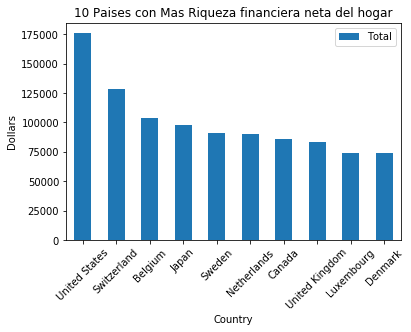

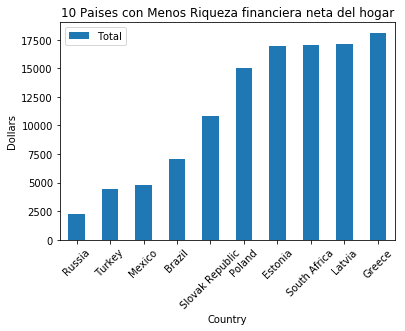

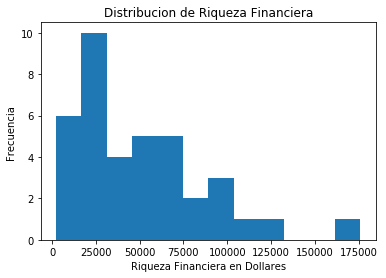

In [21]:
IW_HNFWSort2=IW_HNFWSort
IW_HNFWSort3=IW_HNFWSort2[['Country', 'Total']]
IW_HNFWSort10mas=IW_HNFWSort3.set_index('Country').nlargest(10,'Total')
IW_HNFWSort10menos=IW_HNFWSort3.set_index('Country').nsmallest(10,'Total')
IW_HNFWSort10mas.plot.bar(rot='45')
plt.xlabel('Country')
plt.ylabel('Dollars')
plt.title('10 Paises con Mas Riqueza financiera neta del hogar')
plt.show()
IW_HNFWSort10menos.plot.bar(rot='45')
plt.xlabel('Country')
plt.ylabel('Dollars')
plt.title('10 Paises con Menos Riqueza financiera neta del hogar')
plt.show()
plt.hist(IW_HNFWSort['Total'],12)
plt.xlabel('Riqueza Financiera en Dollares')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Riqueza Financiera')
plt.show()

#### Observaciones
Estados Unidos es el pais con mayor Riqueza financiera en el Hogar, con una diferencia de 50,000 Dollares con el pais que tiene el 2do lugar.
Por otro lado los 3 paises con menor riqueza finaciera son Rusia, Turquia y Mexico, apenas logran llegar a los 5 mil dollares de riqueza financiera, contra los 175 mil de Estados Unidos

#### 2. Ingresos Personales  JE_PEARN = Personal earnings


In [22]:
JE_PEARN=grupo1.get_group('JE_PEARN')
JE_PEARNSort=JE_PEARN.sort_values('Total', ascending=False)
JE_PEARNSort['Rank']=Rank
JE_PEARNSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
1330,Luxembourg,Personal earnings,JE_PEARN,US Dollar,62636.0,1
1343,United States,Personal earnings,JE_PEARN,US Dollar,60154.0,2
1340,Switzerland,Personal earnings,JE_PEARN,US Dollar,60124.0,3


In [23]:
JE_PEARNSort['Total'].describe()

count       38.000000
mean     37435.947368
std      14256.985959
min      11554.000000
25%      23923.750000
50%      38223.000000
75%      49291.000000
max      62636.000000
Name: Total, dtype: float64

In [24]:
NivDes2=[]
for x in JE_PEARNSort['Total']:
    if x < 24125.0: y = 1
    elif x < 39112.0: y = 2
    elif x < 48994.00: y = 3
    else:  y = 4
    NivDes2.append(y)
JE_PEARNSort['NivDes']=NivDes2
JE_PEARNSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
1330,Luxembourg,Personal earnings,JE_PEARN,US Dollar,62636.0,1,4
1343,United States,Personal earnings,JE_PEARN,US Dollar,60154.0,2,4
1340,Switzerland,Personal earnings,JE_PEARN,US Dollar,60124.0,3,4


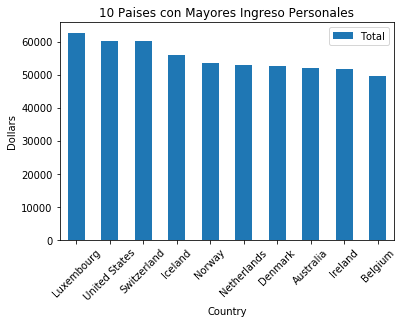

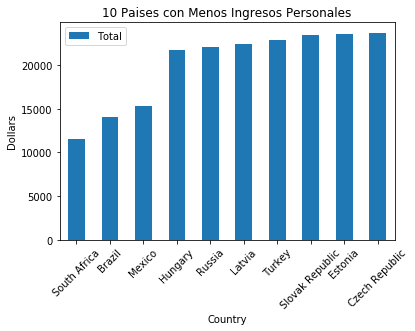

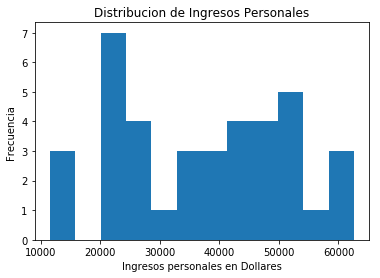

In [25]:
JE_PEARNSort2=JE_PEARNSort
JE_PEARNSort3=JE_PEARNSort2[['Country', 'Total']]
JE_PEARNSort10mas=JE_PEARNSort3.set_index('Country').nlargest(10,'Total')
JE_PEARNSort10menos=JE_PEARNSort3.set_index('Country').nsmallest(10,'Total')
JE_PEARNSort10mas.plot.bar(rot='45')
plt.xlabel('Country')
plt.ylabel('Dollars')
plt.title('10 Paises con Mayores Ingreso Personales')
plt.show()
JE_PEARNSort10menos.plot.bar(rot='45')
plt.xlabel('Country')
plt.ylabel('Dollars')
plt.title('10 Paises con Menos Ingresos Personales')
plt.show()
plt.hist(JE_PEARNSort['Total'],12)
plt.xlabel('Ingresos personales en Dollares')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Ingresos Personales')
plt.show()

#### Observaciones
Los paises con mas ingresos personales son Luxemburgo, Estados Unidos y Suiza.
Y los con menos ingreos son SudAfrica, Brasil y Mexico, estan de 20 mil USD, por debajo de la media que es de $37,435 USD


#### 3. Renta disponible neta ajustada del hogar  
#### 'IW_HADI' = Household net adjusted disposable income

In [26]:
IW_HADI=grupo1.get_group('IW_HADI')
IW_HADISort=IW_HADI.sort_values('Total', ascending=False)
IW_HADISort['Rank']=Rank
IW_HADISort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
645,United States,Household net adjusted disposable income,IW_HADI,US Dollar,44049.0,1
632,Luxembourg,Household net adjusted disposable income,IW_HADI,US Dollar,41317.0,2
642,Switzerland,Household net adjusted disposable income,IW_HADI,US Dollar,36378.0,3


In [27]:
IW_HADISort['Total'].describe()

count       38.000000
mean     25113.842105
std       8026.038939
min      10872.000000
25%      18725.250000
50%      24902.500000
75%      30331.750000
max      44049.000000
Name: Total, dtype: float64

In [28]:
NivDes3=[]
for x in IW_HADISort['Total']:
    if x < 18785.5: y = 1
    elif x < 25439.00: y = 2
    elif x < 30503.00: y = 3
    else: y = 4
    NivDes3.append(y)
IW_HADISort['NivDes']=NivDes3
IW_HADISort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
645,United States,Household net adjusted disposable income,IW_HADI,US Dollar,44049.0,1,4
632,Luxembourg,Household net adjusted disposable income,IW_HADI,US Dollar,41317.0,2,4
642,Switzerland,Household net adjusted disposable income,IW_HADI,US Dollar,36378.0,3,4


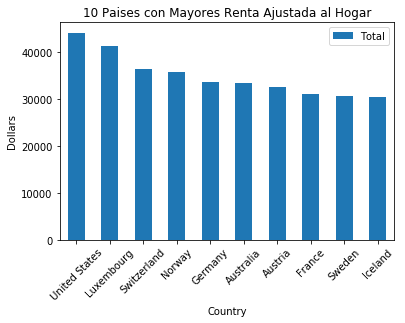

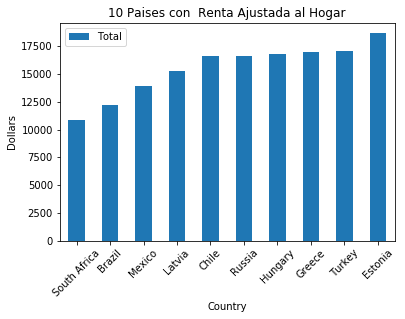

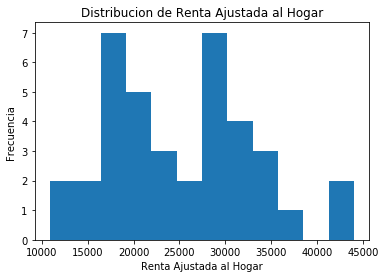

In [29]:
IW_HADISort2=IW_HADISort
IW_HADISort3=IW_HADISort2[['Country', 'Total']]
IW_HADISort10mas=IW_HADISort3.set_index('Country').nlargest(10,'Total')
IW_HADISort10menos=IW_HADISort3.set_index('Country').nsmallest(10,'Total')
IW_HADISort10mas.plot.bar(rot='45')
plt.xlabel('Country')
plt.ylabel('Dollars')
plt.title('10 Paises con Mayores Renta Ajustada al Hogar')
plt.show()
IW_HADISort10menos.plot.bar(rot='45')
plt.xlabel('Country')
plt.ylabel('Dollars')
plt.title('10 Paises con  Renta Ajustada al Hogar')
plt.show()
plt.hist(IW_HADISort['Total'],12)
plt.xlabel('Renta Ajustada al Hogar')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Renta Ajustada al Hogar')
plt.show()

#### Observaciones

Los Paises con Mayor renta ajustada al Hogar son Estados Unidos, Luxemburgo y Suiza, con mas de 18,000 USD por encima de la media
Y los Paises con  Menor renta ajustada al Hogar son SudAfrica, Brazil y Mexico, con mas de 12,00 USD por debajo de la media la cual es de 25,113 USD



####  4. Habilidades de los Estudiantes  'ES_STCS' =	Student skills	

In [30]:
ES_STCS=grupo1.get_group('ES_STCS')
ES_STCSSort=ES_STCS.sort_values('Total', ascending=False)
ES_STCSSort['Rank']=Rank
ES_STCSSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
1822,Japan,Student skills,ES_STCS,Average score,529.0,1
1840,Estonia,Student skills,ES_STCS,Average score,524.0,2
1811,Canada,Student skills,ES_STCS,Average score,523.0,3


In [31]:
ES_STCSSort['Total'].describe()

count     38.000000
mean     486.763158
std       33.510333
min      391.000000
25%      481.500000
50%      496.000000
75%      506.000000
max      529.000000
Name: Total, dtype: float64

In [32]:
NivDes4=[]
for x in ES_STCSSort['Total']:
    if x < 482.00: y = 1
    elif x < 495.00: y = 2
    elif x < 505.00: y = 3
    else:  y = 4
    NivDes4.append(y)
ES_STCSSort['NivDes']=NivDes4
ES_STCSSort.head()

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
1822,Japan,Student skills,ES_STCS,Average score,529.0,1,4
1840,Estonia,Student skills,ES_STCS,Average score,524.0,2,4
1811,Canada,Student skills,ES_STCS,Average score,523.0,3,4
1814,Finland,Student skills,ES_STCS,Average score,523.0,4,4
1823,Korea,Student skills,ES_STCS,Average score,519.0,5,4


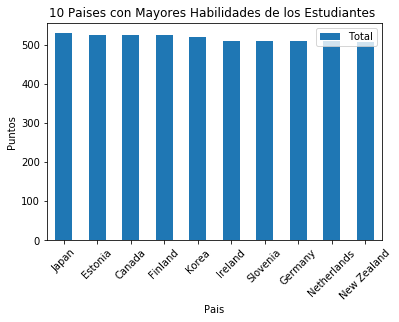

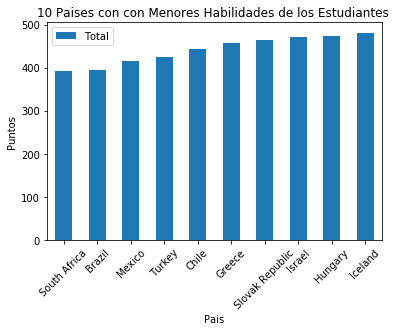

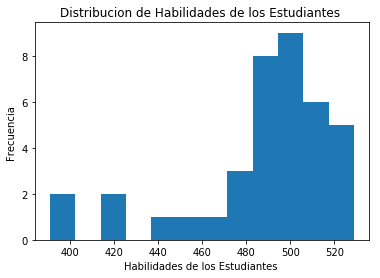

In [33]:
ES_STCSSort2=ES_STCSSort
ES_STCSSort3=ES_STCSSort2[['Country', 'Total']]
ES_STCSSort10mas=ES_STCSSort3.set_index('Country').nlargest(10,'Total')
ES_STCSSort10menos=ES_STCSSort3.set_index('Country').nsmallest(10,'Total')

ES_STCSSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Puntos')
plt.title('10 Paises con Mayores Habilidades de los Estudiantes ')
plt.show()
ES_STCSSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Puntos')
plt.title('10 Paises con con Menores Habilidades de los Estudiantes ')
plt.show()
plt.hist(ES_STCSSort['Total'],12)
plt.xlabel('Habilidades de los Estudiantes ')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Habilidades de los Estudiantes ')
plt.show()

#### Observaciones

En cuanto a las habilidades estudiantiles, vemos que estan en un rango de 391 a 520 puntos, con una media de 486 puntos.

Los 10 paises con mayores habilidades estan arriba de 500 puntos,  y los que menos tienes son SudAfrica, Brazil, Mexico y Turquia. La mayoria de los paises esta muy cerca de la media.

#### 5. Calidad del Agua  // 'EQ_WATER' = Water quality

In [34]:
EQ_WATER=grupo1.get_group('EQ_WATER')
EQ_WATERSort=EQ_WATER.sort_values('Total', ascending=False)
EQ_WATERSort['Rank']=Rank
EQ_WATERSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2246,Iceland,Water quality,EQ_WATER,Percentage,99.0,1
2255,Norway,Water quality,EQ_WATER,Percentage,96.0,2
2261,Switzerland,Water quality,EQ_WATER,Percentage,96.0,3


In [35]:
EQ_WATERSort['Total'].describe()

count    38.000000
mean     82.263158
std      10.866970
min      54.000000
25%      73.750000
50%      84.000000
75%      91.750000
max      99.000000
Name: Total, dtype: float64

In [36]:
NivDes5=[]
for x in EQ_WATERSort['Total']:
    if x < 74.50: y = 1
    elif x < 83.00: y = 2
    elif x < 90.00: y = 3
    else:  y = 4
    NivDes5.append(y)
EQ_WATERSort['NivDes']=NivDes5
EQ_WATERSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2246,Iceland,Water quality,EQ_WATER,Percentage,99.0,1,4
2255,Norway,Water quality,EQ_WATER,Percentage,96.0,2,4
2261,Switzerland,Water quality,EQ_WATER,Percentage,96.0,3,4


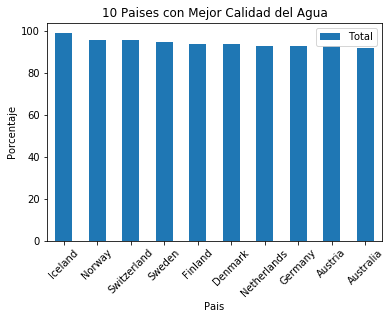

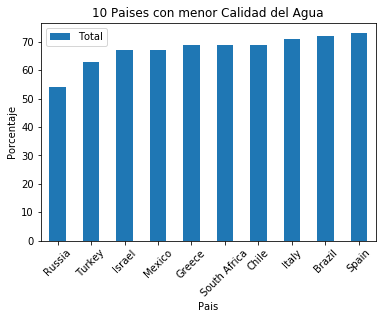

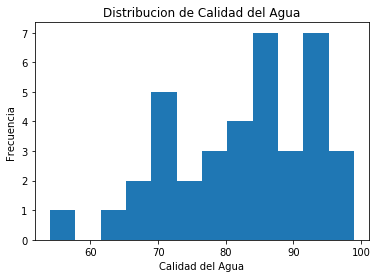

In [37]:
EQ_WATERSort2=EQ_WATERSort
EQ_WATERSort3=EQ_WATERSort2[['Country', 'Total']]
EQ_WATERSort10mas=EQ_WATERSort3.set_index('Country').nlargest(10,'Total')
EQ_WATERSort10menos=EQ_WATERSort3.set_index('Country').nsmallest(10,'Total')
EQ_WATERSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Mejor Calidad del Agua')
plt.show()
EQ_WATERSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con menor Calidad del Agua')
plt.show()
plt.hist(EQ_WATERSort['Total'],12)
plt.xlabel('Calidad del Agua')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Calidad del Agua')
plt.show()

#### Observaciones

El pais que tiene peor calida en el Agua es Russia son solo el 50% en su valor, al media de la calidad el Agua es 82.2 %


#### 6.  Calidad de la red de soporte // SC_SNTWS = Quality of support network	

In [38]:
SC_SNTWS=grupo1.get_group('SC_SNTWS')
SC_SNTWSSort=SC_SNTWS.sort_values('Total', ascending=False)
SC_SNTWSSort['Rank']=Rank
SC_SNTWSSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
1520,Iceland,Quality of support network,SC_SNTWS,Percentage,98.0,1
1521,Ireland,Quality of support network,SC_SNTWS,Percentage,96.0,2
1514,Denmark,Quality of support network,SC_SNTWS,Percentage,95.0,3


In [39]:
SC_SNTWSSort['Total'].describe()

count    38.000000
mean     90.026316
std       4.594279
min      76.000000
25%      88.000000
50%      90.500000
75%      93.000000
max      98.000000
Name: Total, dtype: float64

In [40]:
NivDes6=[]
for x in SC_SNTWSSort['Total']:
    if x < 88.00: y = 1
    elif x < 90.00: y = 2
    elif x < 93.00: y = 3
    else: y = 4
    NivDes6.append(y)
SC_SNTWSSort['NivDes']=NivDes6
SC_SNTWSSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
1520,Iceland,Quality of support network,SC_SNTWS,Percentage,98.0,1,4
1521,Ireland,Quality of support network,SC_SNTWS,Percentage,96.0,2,4
1514,Denmark,Quality of support network,SC_SNTWS,Percentage,95.0,3,4


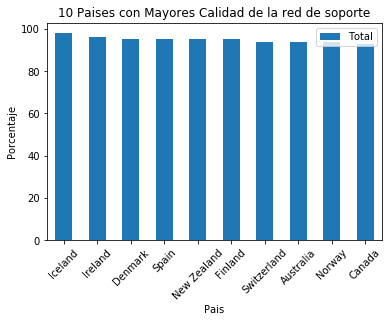

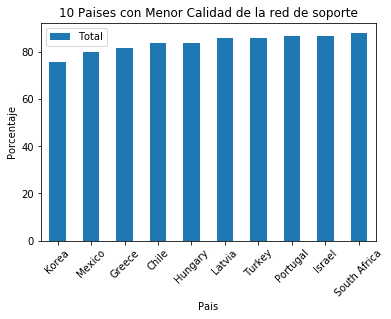

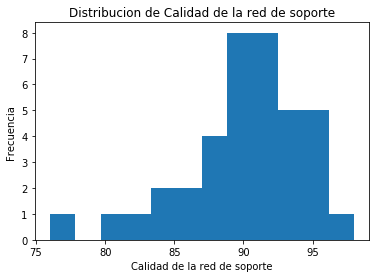

In [41]:
SC_SNTWSSort2=SC_SNTWSSort
SC_SNTWSSort3=SC_SNTWSSort2[['Country', 'Total']]
SC_SNTWSSort10mas=SC_SNTWSSort3.set_index('Country').nlargest(10,'Total')
SC_SNTWSSort10menos=SC_SNTWSSort3.set_index('Country').nsmallest(10,'Total')
SC_SNTWSSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Mayores Calidad de la red de soporte')
plt.show()
SC_SNTWSSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Menor Calidad de la red de soporte')
plt.show()
plt.hist(SC_SNTWSSort['Total'],12)
plt.xlabel('Calidad de la red de soporte')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Calidad de la red de soporte')
plt.show()

#### 7. Logro educativo // 'ES_EDUA' = Educational attainment

In [42]:
ES_EDUA=grupo1.get_group('ES_EDUA')
ES_EDUASort=ES_EDUA.sort_values('Total', ascending=False)
ES_EDUASort['Rank']=Rank
ES_EDUASort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
1726,Russia,Educational attainment,ES_EDUA,Percentage,95.0,1
1705,Japan,Educational attainment,ES_EDUA,Percentage,94.0,2
1695,Czech Republic,Educational attainment,ES_EDUA,Percentage,93.0,3


In [43]:
ES_EDUASort['Total'].describe()

count    38.000000
mean     77.236842
std      15.995665
min      37.000000
25%      75.500000
50%      81.500000
75%      87.750000
max      95.000000
Name: Total, dtype: float64

In [44]:
NivDes7=[]
for x in ES_EDUASort['Total']:
    if x < 74.50: y = 1
    elif x < 81.00: y = 2
    elif x < 87.50: y = 3
    else: y = 4
    NivDes7.append(y)
ES_EDUASort['NivDes']=NivDes7
ES_EDUASort.head(1)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
1726,Russia,Educational attainment,ES_EDUA,Percentage,95.0,1,4


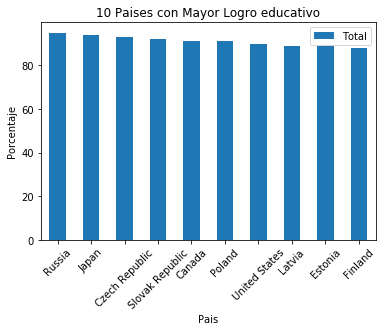

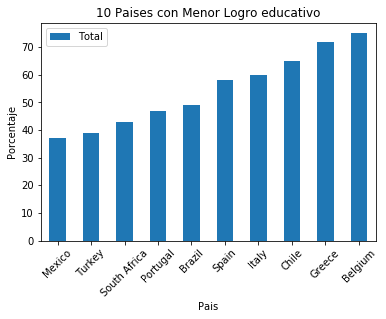

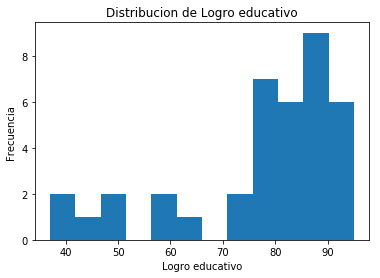

In [45]:
ES_EDUASort2=ES_EDUASort
ES_EDUASort3=ES_EDUASort2[['Country', 'Total']]
ES_EDUASort10mas=ES_EDUASort3.set_index('Country').nlargest(10,'Total')
ES_EDUASort10menos=ES_EDUASort3.set_index('Country').nsmallest(10,'Total')
ES_EDUASort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Mayor Logro educativo')
plt.show()
ES_EDUASort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Menor Logro educativo')
plt.show()
plt.hist(ES_EDUASort['Total'],12)
plt.xlabel('Logro educativo')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Logro educativo')
plt.show()

#### Observaciones

####  8. Participación electoral  // 'CG_VOTO' = Voter turnout

In [46]:
CG_VOTO=grupo1.get_group('CG_VOTO')
CG_VOTOSort=CG_VOTO.sort_values('Total', ascending=False)
CG_VOTOSort['Rank']=Rank
CG_VOTOSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2368,Luxembourg,Voter turnout,CG_VOTO,Percentage,91.0,1
2352,Australia,Voter turnout,CG_VOTO,Percentage,91.0,2
2354,Belgium,Voter turnout,CG_VOTO,Percentage,89.0,3


In [47]:
CG_VOTOSort['Total'].describe()

count    38.000000
mean     70.026316
std      11.674613
min      49.000000
25%      62.250000
50%      69.500000
75%      77.750000
max      91.000000
Name: Total, dtype: float64

In [48]:
NivDes8=[]
for x in CG_VOTOSort['Total']:
    if x < 62.50: y = 1
    elif x < 69.00: y = 2
    elif x < 77.50: y = 3
    else:  y = 4
    NivDes8.append(y)
CG_VOTOSort['NivDes']=NivDes8
CG_VOTOSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2368,Luxembourg,Voter turnout,CG_VOTO,Percentage,91.0,1,4
2352,Australia,Voter turnout,CG_VOTO,Percentage,91.0,2,4
2354,Belgium,Voter turnout,CG_VOTO,Percentage,89.0,3,4


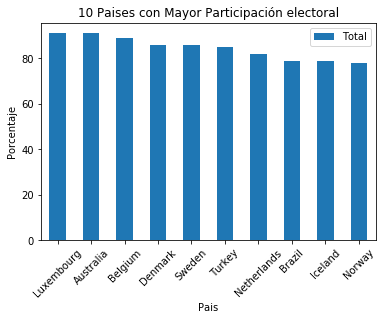

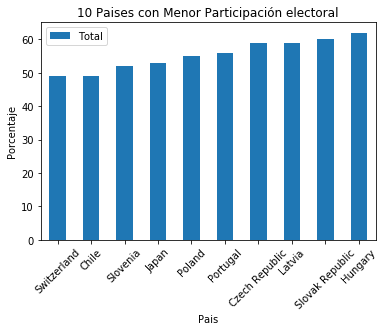

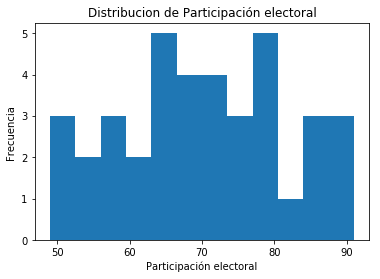

In [49]:
CG_VOTOSort2=CG_VOTOSort
CG_VOTOSort3=CG_VOTOSort2[['Country', 'Total']]
CG_VOTOSort10mas=CG_VOTOSort3.set_index('Country').nlargest(10,'Total')
CG_VOTOSort10menos=CG_VOTOSort3.set_index('Country').nsmallest(10,'Total')
CG_VOTOSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Mayor Participación electoral')
plt.show()
CG_VOTOSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Menor Participación electoral')
plt.show()
plt.hist(CG_VOTOSort['Total'],12)
plt.xlabel('Participación electoral')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Participación electoral')
plt.show()

#### Observaciones

#### 9. Salud auto-reportada  //  'HS_SFRH' = Self-reported health


In [50]:
HS_SFRH=grupo1.get_group('HS_SFRH')
HS_SFRHSort=HS_SFRH.sort_values('Total', ascending=False)
HS_SFRHSort['Rank']=Rank
HS_SFRHSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2693,United States,Self-reported health,HS_SFRH,Percentage,88.0,1
2667,Canada,Self-reported health,HS_SFRH,Percentage,88.0,2
2683,New Zealand,Self-reported health,HS_SFRH,Percentage,88.0,3


In [51]:
HS_SFRHSort['Total'].describe()

count    38.000000
mean     67.447368
std      13.976230
min      33.000000
25%      62.000000
50%      70.000000
75%      76.000000
max      88.000000
Name: Total, dtype: float64

In [52]:
HS_SFRHSort['Total'].describe()
NivDes9=[]
for x in HS_SFRHSort['Total']:
    if x < 63: y = 1
    elif x < 70:  y = 2
    elif x < 76:  y = 3
    else: y = 4
    NivDes9.append(y)
HS_SFRHSort['NivDes']=NivDes9
HS_SFRHSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2693,United States,Self-reported health,HS_SFRH,Percentage,88.0,1,4
2667,Canada,Self-reported health,HS_SFRH,Percentage,88.0,2,4
2683,New Zealand,Self-reported health,HS_SFRH,Percentage,88.0,3,4


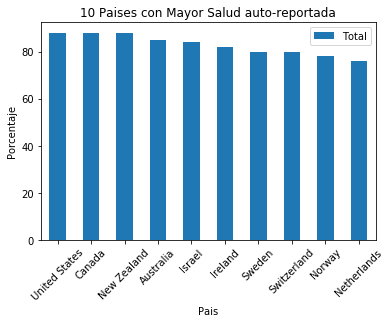

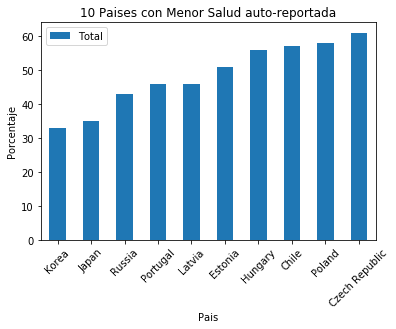

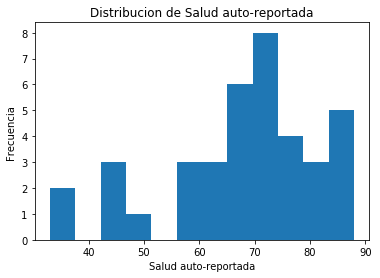

In [53]:
HS_SFRHSort2=HS_SFRHSort
HS_SFRHSort3=HS_SFRHSort2[['Country', 'Total']]
HS_SFRHSort10mas=HS_SFRHSort3.set_index('Country').nlargest(10,'Total')
HS_SFRHSort10menos=HS_SFRHSort3.set_index('Country').nsmallest(10,'Total')
HS_SFRHSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Mayor Salud auto-reportada')
plt.show()
HS_SFRHSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Menor Salud auto-reportada')
plt.show()
plt.hist(HS_SFRHSort['Total'],12)
plt.xlabel('Salud auto-reportada')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Salud auto-reportada')
plt.show()

#### Observaciones


####  10. Sentirse seguro caminando solo por la noche // PS_FSAFEN = Feeling safe walking alone at night

In [54]:
PS_FSAFEN=grupo1.get_group('PS_FSAFEN')
PS_FSAFENSort=PS_FSAFEN.sort_values('Total', ascending=False)
PS_FSAFENSort['Rank']=Rank
PS_FSAFENSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
174,Norway,Feeling safe walking alone at night,PS_FSAFEN,Percentage,87.7,1
165,Iceland,Feeling safe walking alone at night,PS_FSAFEN,Percentage,87.0,2
190,Slovenia,Feeling safe walking alone at night,PS_FSAFEN,Percentage,84.7,3


In [55]:
PS_FSAFENSort['Total'].describe()

count    38.000000
mean     68.634211
std      13.195644
min      36.100000
25%      60.975000
50%      70.400000
75%      79.875000
max      87.700000
Name: Total, dtype: float64

In [56]:
NivDes10=[]
for x in PS_FSAFENSort['Total']:
    if x < 61.25: y = 1
    elif x < 70.20: y = 2
    elif x < 79.05: y = 3
    else: y = 4
    NivDes10.append(y)
PS_FSAFENSort['NivDes']=NivDes10
PS_FSAFENSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
174,Norway,Feeling safe walking alone at night,PS_FSAFEN,Percentage,87.7,1,4
165,Iceland,Feeling safe walking alone at night,PS_FSAFEN,Percentage,87.0,2,4
190,Slovenia,Feeling safe walking alone at night,PS_FSAFEN,Percentage,84.7,3,4


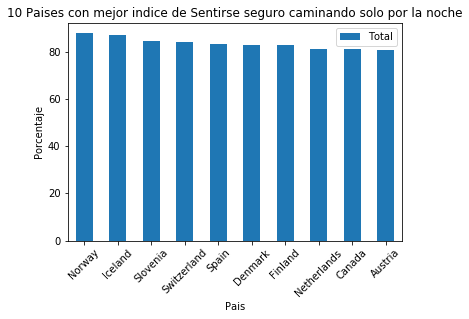

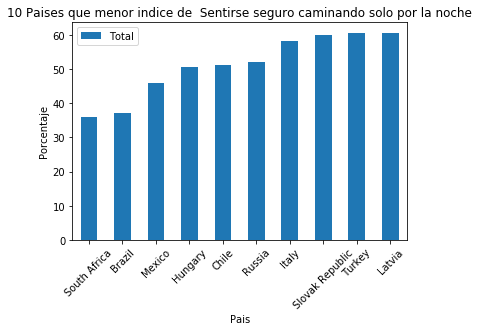

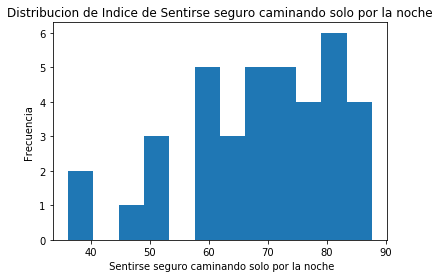

In [57]:
PS_FSAFENSort2=PS_FSAFENSort
PS_FSAFENSort3=PS_FSAFENSort2[['Country', 'Total']]
PS_FSAFENSort10mas=PS_FSAFENSort3.set_index('Country').nlargest(10,'Total')
PS_FSAFENSort10menos=PS_FSAFENSort3.set_index('Country').nsmallest(10,'Total')
PS_FSAFENSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con mejor indice de Sentirse seguro caminando solo por la noche')
plt.show()
PS_FSAFENSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises que menor indice de  Sentirse seguro caminando solo por la noche')
plt.show()
plt.hist(PS_FSAFENSort['Total'],12)
plt.xlabel(' Sentirse seguro caminando solo por la noche')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Indice de Sentirse seguro caminando solo por la noche')
plt.show()

#### Observaciones

####  11. Tasa de Empleo //  JE_EMPL = Employment rate

In [58]:
JE_EMPL=grupo1.get_group('JE_EMPL')
JE_EMPLSort=JE_EMPL.sort_values('Total', ascending=False)
JE_EMPLSort['Rank']=Rank
JE_EMPLSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
935,Iceland,Employment rate,JE_EMPL,Percentage,86.0,1
950,Switzerland,Employment rate,JE_EMPL,Percentage,80.0,2
949,Sweden,Employment rate,JE_EMPL,Percentage,76.0,3


In [59]:
JE_EMPLSort['Total'].describe()

count    38.000000
mean     67.736842
std       8.212332
min      43.000000
25%      65.000000
50%      69.000000
75%      73.750000
max      86.000000
Name: Total, dtype: float64

In [60]:
NivDes11=[]
for x in JE_EMPLSort['Total']:
    if x < 65: y = 1
    elif x < 69: y = 2
    elif x < 73.50: y = 3
    else:  y = 4
    NivDes11.append(y)
JE_EMPLSort['NivDes']=NivDes11
JE_EMPLSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
935,Iceland,Employment rate,JE_EMPL,Percentage,86.0,1,4
950,Switzerland,Employment rate,JE_EMPL,Percentage,80.0,2,4
949,Sweden,Employment rate,JE_EMPL,Percentage,76.0,3,4


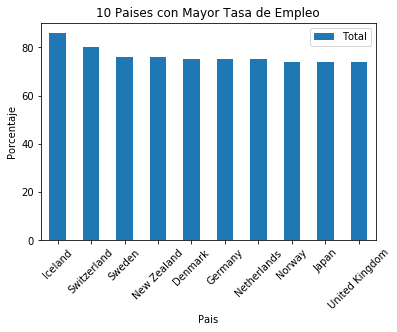

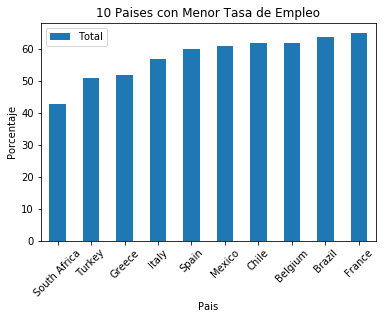

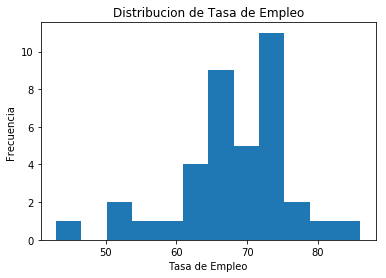

In [61]:
JE_EMPLSort2=JE_EMPLSort
JE_EMPLSort3=JE_EMPLSort2[['Country', 'Total']]
JE_EMPLSort10mas=JE_EMPLSort3.set_index('Country').nlargest(10,'Total')
JE_EMPLSort10menos=JE_EMPLSort3.set_index('Country').nsmallest(10,'Total')
JE_EMPLSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Mayor Tasa de Empleo')
plt.show()
JE_EMPLSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Porcentaje')
plt.title('10 Paises con Menor Tasa de Empleo')
plt.show()
plt.hist(JE_EMPLSort['Total'],12)
plt.xlabel('Tasa de Empleo')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Tasa de Empleo')
plt.show()

#### Observaciones

####  12. Expectativa de Vida  //  'HS_LEB' = Life expectancy

In [62]:
HS_LEB=grupo1.get_group('HS_LEB')
HS_LEBSort=HS_LEB.sort_values('Total', ascending=False)
HS_LEBSort['Rank']=Rank
HS_LEBSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2561,Japan,Life expectancy,HS_LEB,Years,83.9,1
2571,Spain,Life expectancy,HS_LEB,Years,83.0,2
2573,Switzerland,Life expectancy,HS_LEB,Years,83.0,3


In [63]:
HS_LEBSort['Total'].describe()

count    38.000000
mean     79.539474
std       4.690043
min      57.400000
25%      78.175000
50%      81.150000
75%      82.250000
max      83.900000
Name: Total, dtype: float64

In [64]:
NivDes12=[]
for x in HS_LEBSort['Total']:
    if x < 78.35: y = 1
    elif x < 81.10: y = 2
    elif x < 82.20: y = 3
    else: y = 4
    NivDes12.append(y)
HS_LEBSort['NivDes']=NivDes12
HS_LEBSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2561,Japan,Life expectancy,HS_LEB,Years,83.9,1,4
2571,Spain,Life expectancy,HS_LEB,Years,83.0,2,4
2573,Switzerland,Life expectancy,HS_LEB,Years,83.0,3,4


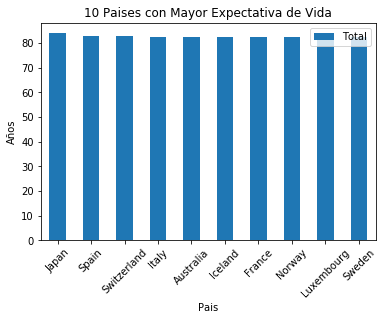

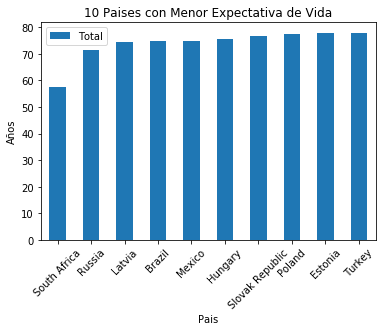

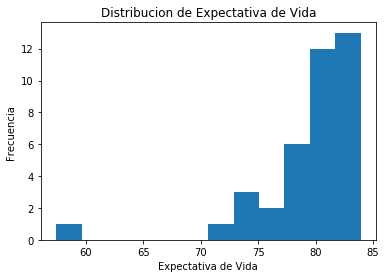

In [65]:
HS_LEBSort2=HS_LEBSort
HS_LEBSort3=HS_LEBSort2[['Country', 'Total']]
HS_LEBSort10mas=HS_LEBSort3.set_index('Country').nlargest(10,'Total')
HS_LEBSort10menos=HS_LEBSort3.set_index('Country').nsmallest(10,'Total')
HS_LEBSort10mas.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Años')
plt.title('10 Paises con Mayor Expectativa de Vida')
plt.show()
HS_LEBSort10menos.plot.bar(rot='45')
plt.xlabel('Pais')
plt.ylabel('Años')
plt.title('10 Paises con Menor Expectativa de Vida')
plt.show()
plt.hist(HS_LEBSort['Total'],12)
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frecuencia ')
plt.title('Distribucion de Expectativa de Vida')
plt.show()

#### Observaciones

#### 13. Viviendas sin instalaciones básicas. 'HO_BASE' =  Dwellings without basic facilities (Valor negativo)

In [66]:
HO_BASE=grupo1.get_group('HO_BASE')
HO_BASESort=HO_BASE.sort_values('Total', ascending=False)
HO_BASESort['Rank']=Rank
HO_BASESort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
308,South Africa,Dwellings without basic facilities,HO_BASE,Percentage,37.0,1
306,Russia,Dwellings without basic facilities,HO_BASE,Percentage,13.8,2
305,Latvia,Dwellings without basic facilities,HO_BASE,Percentage,12.9,3


In [67]:
HO_BASESort['Total'].describe()

count    38.00000
mean      3.45000
std       6.63886
min       0.00000
25%       0.12500
50%       0.60000
75%       4.27500
max      37.00000
Name: Total, dtype: float64

In [68]:
NivDes13=[]
for x in HO_BASESort['Total']:
    if x < .15:
        y = 4
    elif x < .60 :
        y = 3
    elif x < 4.25:
         y = 2
    else: 
        y = 1
    NivDes13.append(y)
HO_BASESort['NivDes']=NivDes13
HO_BASESort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
308,South Africa,Dwellings without basic facilities,HO_BASE,Percentage,37.0,1,1
306,Russia,Dwellings without basic facilities,HO_BASE,Percentage,13.8,2,1
305,Latvia,Dwellings without basic facilities,HO_BASE,Percentage,12.9,3,1
302,Chile,Dwellings without basic facilities,HO_BASE,Percentage,9.4,4,1
303,Estonia,Dwellings without basic facilities,HO_BASE,Percentage,6.9,5,1


In [69]:
HO_BaseSort2=HO_BASESort[['Country', 'Total']]
HO_BaseSort10mas=HO_BaseSort2.set_index('Country').nlargest(10,'Total')
HO_BaseSort10menos=HO_BaseSort2.set_index('Country').nsmallest(10,'Total')

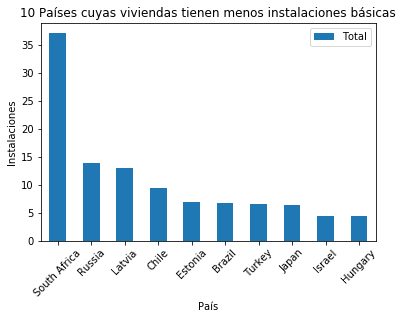

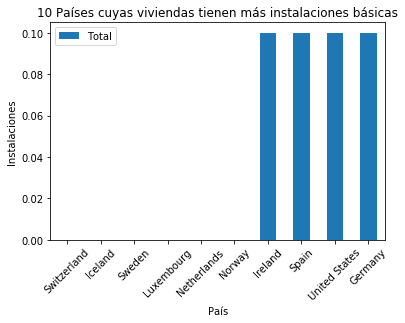

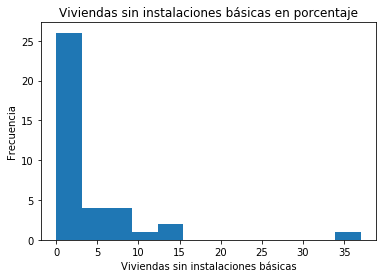

In [70]:
HO_BaseSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Instalaciones')
plt.title('10 Países cuyas viviendas tienen menos instalaciones básicas')
plt.show()

HO_BaseSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Instalaciones')
plt.title('10 Países cuyas viviendas tienen más instalaciones básicas')
plt.show()

plt.hist(HO_BASESort['Total'],12)
plt.xlabel("Viviendas sin instalaciones básicas")
plt.ylabel('Frecuencia')
plt.title("Viviendas sin instalaciones básicas en porcentaje")
plt.show()

#### Observaciones:
##### El país que se separa de los valores es South Africa, con muchas viviendas sin instalaciones básicas.


#### 14. Empleados trabajando horas muy largas. 'WL_EWLH' = Employees working very long hours (valor negativo)

In [71]:
WL_EWLH=grupo1.get_group('WL_EWLH')
WL_EWLHSort=WL_EWLH.sort_values('Total', ascending=False)
WL_EWLHSort['Rank']=Rank
WL_EWLHSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
3191,Turkey,Employees working very long hours,WL_EWLH,Percentage,33.77,1
3181,Mexico,Employees working very long hours,WL_EWLH,Percentage,29.48,2
3178,Japan,Employees working very long hours,WL_EWLH,Percentage,21.81,3


In [72]:
WL_EWLHSort['Total'].describe()

count    38.000000
mean      8.723158
std       7.797336
min       0.160000
25%       3.795000
50%       6.225000
75%      12.372500
max      33.770000
Name: Total, dtype: float64

In [73]:
NivDes14=[]
for x in WL_EWLHSort['Total']:
    if x < 3.83:
        y = 4
    elif x < 6.68:
        y = 3
    elif x < 12.65:
         y = 2
    else: 
        y = 1
    NivDes14.append(y)

WL_EWLHSort['NivDes']= NivDes14
WL_EWLHSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
3191,Turkey,Employees working very long hours,WL_EWLH,Percentage,33.77,1,1
3181,Mexico,Employees working very long hours,WL_EWLH,Percentage,29.48,2,1
3178,Japan,Employees working very long hours,WL_EWLH,Percentage,21.81,3,1
3179,Korea,Employees working very long hours,WL_EWLH,Percentage,20.84,4,1
3201,South Africa,Employees working very long hours,WL_EWLH,Percentage,18.68,5,1


In [74]:
WL_EWLHSort2=WL_EWLHSort[['Country', 'Total']]
WL_EWLHSort10mas=WL_EWLHSort2.set_index('Country').nlargest(10,'Total')
WL_EWLHSort10menos=WL_EWLHSort2.set_index('Country').nsmallest(10,'Total')

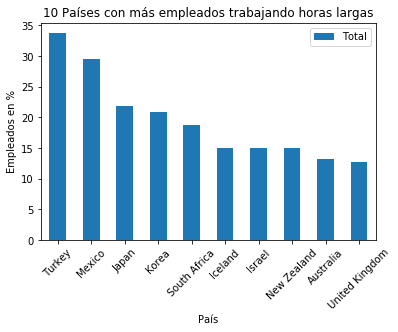

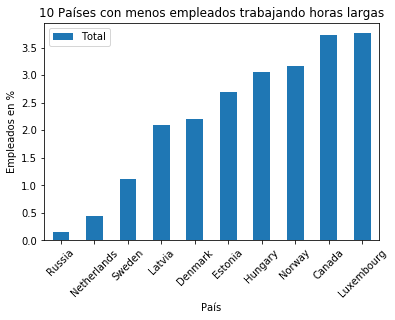

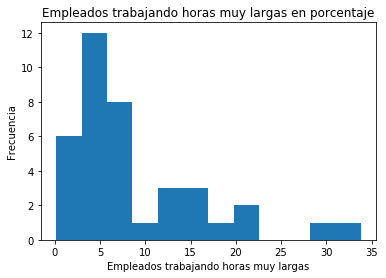

In [75]:
WL_EWLHSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Empleados en %')
plt.title('10 Países con más empleados trabajando horas largas')
plt.show()

WL_EWLHSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Empleados en %')
plt.title('10 Países con menos empleados trabajando horas largas')
plt.show()

plt.hist(WL_EWLHSort['Total'],12)
plt.xlabel("Empleados trabajando horas muy largas")
plt.ylabel('Frecuencia')
plt.title("Empleados trabajando horas muy largas en porcentaje")
plt.show()

#### Observaciones:
##### Los países que se "disparan" en los valores son Turquía y México, con un porcentaje alto de empleados trabajando mucho.

#### 15.  La contaminación del aire 'EQ_AIRP' = Air pollution (valor negativo)

In [76]:
EQ_AIRP=grupo1.get_group('EQ_AIRP')
EQ_AIRPSort=EQ_AIRP.sort_values('Total', ascending=False)
EQ_AIRPSort['Rank']=Rank
EQ_AIRPSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2135,Korea,Air pollution,EQ_AIRP,Micrograms per cubic metre,28.0,1
2141,Poland,Air pollution,EQ_AIRP,Micrograms per cubic metre,22.0,2
2157,South Africa,Air pollution,EQ_AIRP,Micrograms per cubic metre,22.0,3


In [77]:
EQ_AIRPSort['Total'].describe()

count    38.000000
mean     13.394737
std       5.897959
min       3.000000
25%       9.250000
50%      14.000000
75%      17.500000
max      28.000000
Name: Total, dtype: float64

In [78]:
NivDes15=[]
for x in EQ_AIRPSort['Total']:
    if x < 9.5:
        y = 4
    elif x < 14:
        y = 3
    elif x < 17:
         y = 2
    else: 
        y = 1
    NivDes15.append(y)

EQ_AIRPSort['NivDes']=NivDes15
EQ_AIRPSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2135,Korea,Air pollution,EQ_AIRP,Micrograms per cubic metre,28.0,1,1
2141,Poland,Air pollution,EQ_AIRP,Micrograms per cubic metre,22.0,2,1
2157,South Africa,Air pollution,EQ_AIRP,Micrograms per cubic metre,22.0,3,1
2143,Slovak Republic,Air pollution,EQ_AIRP,Micrograms per cubic metre,21.0,4,1
2153,Israel,Air pollution,EQ_AIRP,Micrograms per cubic metre,21.0,5,1


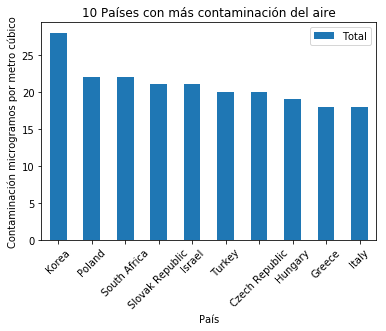

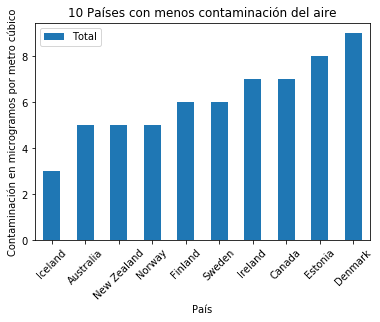

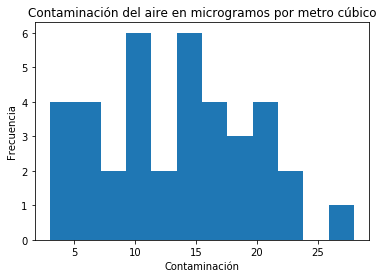

In [79]:
EQ_AIRPSort2=EQ_AIRPSort[['Country', 'Total']]
EQ_AIRPSort10mas=EQ_AIRPSort2.set_index('Country').nlargest(10,'Total')
EQ_AIRPSort10menos=EQ_AIRPSort2.set_index('Country').nsmallest(10,'Total')
EQ_AIRPSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Contaminación microgramos por metro cúbico')
plt.title('10 Países con más contaminación del aire')
plt.show()

EQ_AIRPSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Contaminación en microgramos por metro cúbico')
plt.title('10 Países con menos contaminación del aire')
plt.show()

plt.hist(EQ_AIRPSort['Total'],12)
plt.xlabel("Contaminación")
plt.ylabel('Frecuencia')
plt.title("Contaminación del aire en microgramos por metro cúbico")
plt.show()

#### Observaciones:
##### Korea es el país con más contaminación del aire, con 28 microgramos por metro cúbico.

#### 16. Tasa de Homicidios 'PS_REPH' = Homicide rate (valor negativo)

In [80]:
PS_REPH=grupo1.get_group('PS_REPH')
PS_REPHSort=PS_REPH.sort_values('Total', ascending=False)
PS_REPHSort['Rank']=Rank
PS_REPHSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
3077,Brazil,Homicide rate,PS_REPH,Ratio,27.6,1
3064,Mexico,Homicide rate,PS_REPH,Ratio,17.9,2
3082,Russia,Homicide rate,PS_REPH,Ratio,11.3,3


In [81]:
PS_REPHSort['Total'].describe()

count    38.000000
mean      2.934211
std       5.467955
min       0.200000
25%       0.600000
50%       1.000000
75%       1.625000
max      27.600000
Name: Total, dtype: float64

In [82]:
NivDes16=[]
for x in PS_REPHSort['Total']:
    if x < .60:
        y = 4
    elif x < 1:
        y = 3
    elif x < 1.7:
         y = 2
    else: 
        y = 1
    NivDes16.append(y)

PS_REPHSort['NivDes']=NivDes16
PS_REPHSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
3077,Brazil,Homicide rate,PS_REPH,Ratio,27.6,1,1
3064,Mexico,Homicide rate,PS_REPH,Ratio,17.9,2,1
3082,Russia,Homicide rate,PS_REPH,Ratio,11.3,3,1
3084,South Africa,Homicide rate,PS_REPH,Ratio,10.0,4,1
3081,Latvia,Homicide rate,PS_REPH,Ratio,6.6,5,1


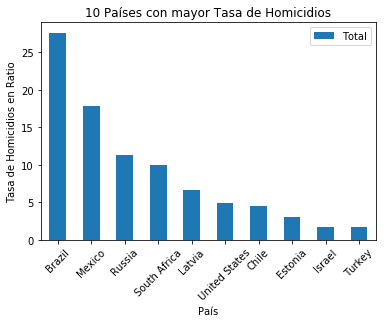

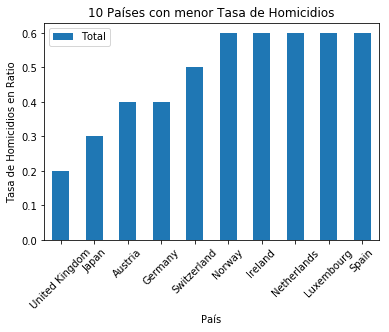

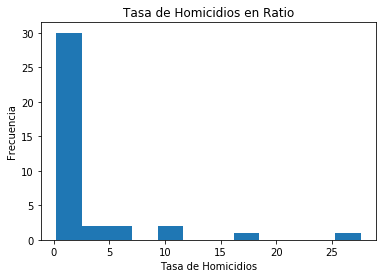

In [83]:
PS_REPHSort2=PS_REPHSort[['Country', 'Total']]
PS_REPHSort10mas=PS_REPHSort2.set_index('Country').nlargest(10,'Total')
PS_REPHSort10menos=PS_REPHSort2.set_index('Country').nsmallest(10,'Total')
PS_REPHSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Tasa de Homicidios en Ratio')
plt.title('10 Países con mayor Tasa de Homicidios')
plt.show()

PS_REPHSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Tasa de Homicidios en Ratio')
plt.title('10 Países con menor Tasa de Homicidios')
plt.show()

plt.hist(PS_REPHSort['Total'],12)
plt.xlabel("Tasa de Homicidios")
plt.ylabel('Frecuencia')
plt.title("Tasa de Homicidios en Ratio")
plt.show()


#### Observaciones:
##### Brasil y México son los primeros dos lugares (nada honrosos) en este indicador, con 27.6 y 16.9 respectivamente.

#### 17. Inseguridad Laboral 'JE_LMIS' = Labour market insecurity (valor negativo)

In [84]:
JE_LMIS=grupo1.get_group('JE_LMIS')
JE_LMISSort=JE_LMIS.sort_values('Total', ascending=False)
JE_LMISSort['Rank']=Rank
JE_LMISSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
37,South Africa,Labour market insecurity,JE_LMIS,Percentage,26.5,1
9,Greece,Labour market insecurity,JE_LMIS,Percentage,17.4,2
24,Spain,Labour market insecurity,JE_LMIS,Percentage,17.3,3


In [85]:
JE_LMISSort['Total'].describe()

count    38.000000
mean      5.476316
std       5.113862
min       1.500000
25%       2.600000
50%       4.000000
75%       5.525000
max      26.500000
Name: Total, dtype: float64

In [86]:
NivDes17=[]

for x in JE_LMISSort['Total']:
    if x < 2.60:
        y = 4
    elif x < 4.00:
        y = 3
    elif x < 5.35:
         y = 2
    else: 
        y = 1
    NivDes17.append(y)

JE_LMISSort['NivDes']=NivDes17
JE_LMISSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
37,South Africa,Labour market insecurity,JE_LMIS,Percentage,26.5,1,1
9,Greece,Labour market insecurity,JE_LMIS,Percentage,17.4,2,1
24,Spain,Labour market insecurity,JE_LMIS,Percentage,17.3,3,1
27,Turkey,Labour market insecurity,JE_LMIS,Percentage,13.0,4,1
13,Italy,Labour market insecurity,JE_LMIS,Percentage,8.1,5,1


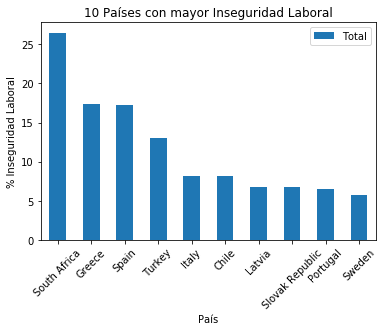

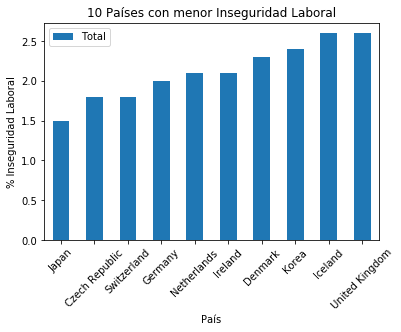

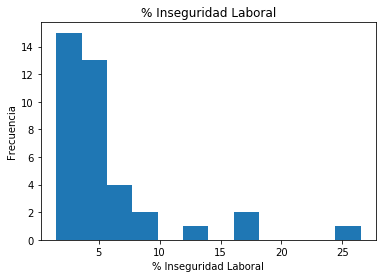

In [87]:
JE_LMISSort2=JE_LMISSort[['Country', 'Total']]
JE_LMISSort10mas=JE_LMISSort2.set_index('Country').nlargest(10,'Total')
JE_LMISSort10menos=JE_LMISSort2.set_index('Country').nsmallest(10,'Total')

JE_LMISSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('% Inseguridad Laboral')
plt.title('10 Países con mayor Inseguridad Laboral')
plt.show()

JE_LMISSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('% Inseguridad Laboral')
plt.title('10 Países con menor Inseguridad Laboral')
plt.show()

plt.hist(JE_LMISSort['Total'],12)
plt.xlabel("% Inseguridad Laboral")
plt.ylabel('Frecuencia')
plt.title("% Inseguridad Laboral")
plt.show()

#### Observaciones:
##### South Africa es el país con mayor inseguridad laboral, con un porcentaje de 26.5

#### 18. Gastos de vivienda  'HO_HISH' = Housing expenditure

In [88]:
HO_HISH=grupo1.get_group('HO_HISH')
HO_HISHSort=HO_HISH.sort_values('Total', ascending=False)
HO_HISHSort['Rank']=Rank
HO_HISHSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
405,New Zealand,Housing expenditure,HO_HISH,Percentage,26.0,1
391,Denmark,Housing expenditure,HO_HISH,Percentage,24.0,2
390,Czech Republic,Housing expenditure,HO_HISH,Percentage,24.0,3


In [89]:
HO_HISHSort['Total'].describe()

count    38.000000
mean     20.894737
std       2.413806
min      15.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      26.000000
Name: Total, dtype: float64

In [90]:
NivDes18=[]

for x in HO_HISHSort['Total']:
    if x < 20.000:
        y = 1
    elif x < 21.000:
        y = 2
    elif x < 23.000:
         y = 3
    else: 
        y = 4
    NivDes18.append(y)

HO_HISHSort['NivDes']=NivDes18
HO_HISHSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
405,New Zealand,Housing expenditure,HO_HISH,Percentage,26.0,1,4
391,Denmark,Housing expenditure,HO_HISH,Percentage,24.0,2,4
390,Czech Republic,Housing expenditure,HO_HISH,Percentage,24.0,3,4
414,United Kingdom,Housing expenditure,HO_HISH,Percentage,24.0,4,4
395,Greece,Housing expenditure,HO_HISH,Percentage,24.0,5,4


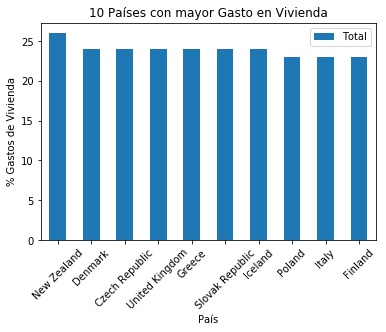

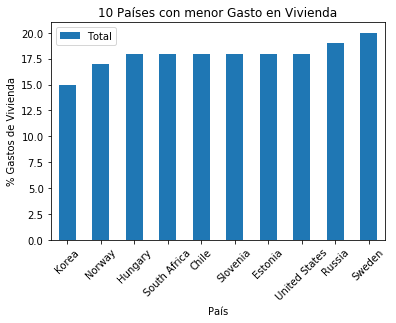

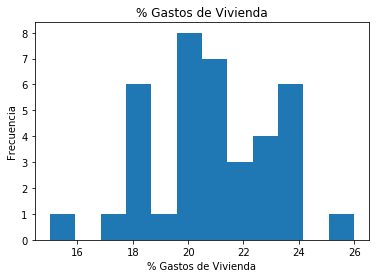

In [91]:
HO_HISHSort2=HO_HISHSort[['Country', 'Total']]
HO_HISHSort10mas=HO_HISHSort2.set_index('Country').nlargest(10,'Total')
HO_HISHSort10menos=HO_HISHSort2.set_index('Country').nsmallest(10,'Total')

HO_HISHSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('% Gastos de Vivienda')
plt.title('10 Países con mayor Gasto en Vivienda')
plt.show()

HO_HISHSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('% Gastos de Vivienda')
plt.title('10 Países con menor Gasto en Vivienda')
plt.show()

plt.hist(HO_HISHSort['Total'],12)
plt.xlabel("% Gastos de Vivienda")
plt.ylabel('Frecuencia')
plt.title("% Gastos de Vivienda")
plt.show()

#### 19.  Años en la educación  'ES_EDUEX' = Years in education

In [92]:
ES_EDUEX=grupo1.get_group('ES_EDUEX')
ES_EDUEXSort=ES_EDUEX.sort_values('Total', ascending=False)
ES_EDUEXSort['Rank']=Rank
ES_EDUEXSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2003,Australia,Years in education,ES_EDUEX,Years,21.2,1
2009,Finland,Years in education,ES_EDUEX,Years,19.8,2
2008,Denmark,Years in education,ES_EDUEX,Years,19.7,3


In [93]:
ES_EDUEXSort['Total'].describe()

count    38.000000
mean     17.376316
std       1.392535
min      14.800000
25%      16.425000
50%      17.300000
75%      18.100000
max      21.200000
Name: Total, dtype: float64

In [94]:
NivDes19=[]

for x in ES_EDUEXSort['Total']:
    if x < 16.450:
        y = 1
    elif x < 17.300:
        y = 2
    elif x < 18.100:
         y = 3
    else: 
        y = 4
    NivDes19.append(y)

ES_EDUEXSort['NivDes']=NivDes19
ES_EDUEXSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2003,Australia,Years in education,ES_EDUEX,Years,21.2,1,4
2009,Finland,Years in education,ES_EDUEX,Years,19.8,2,4
2008,Denmark,Years in education,ES_EDUEX,Years,19.7,3,4
2014,Iceland,Years in education,ES_EDUEX,Years,19.3,4,4
2028,Sweden,Years in education,ES_EDUEX,Years,19.2,5,4


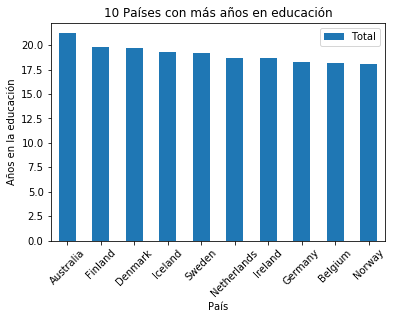

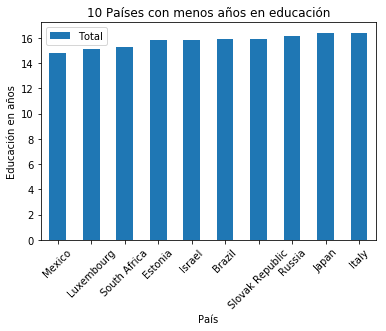

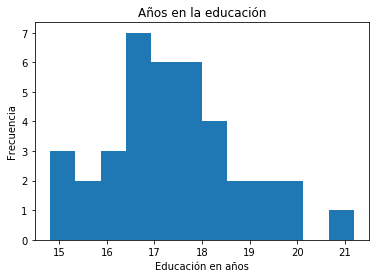

In [95]:
ES_EDUEXSort2=ES_EDUEXSort[['Country', 'Total']]
ES_EDUEXSort10mas=ES_EDUEXSort2.set_index('Country').nlargest(10,'Total')
ES_EDUEXSort10menos=ES_EDUEXSort2.set_index('Country').nsmallest(10,'Total')

ES_EDUEXSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Años en la educación')
plt.title('10 Países con más años en educación')
plt.show()

ES_EDUEXSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Educación en años')
plt.title('10 Países con menos años en educación')
plt.show()

plt.hist(ES_EDUEXSort['Total'],12)
plt.xlabel("Educación en años")
plt.ylabel('Frecuencia')
plt.title("Años en la educación")
plt.show()

#### Observaciones:
##### Australia se destaca con más años en la educación, 21.2

#### 20. Tasa de desempleo a largo plazo 'JE_LTUR' = Long-term unemployment rate (valor negativo)

In [96]:
JE_LTUR=grupo1.get_group('JE_LTUR')
JE_LTURSort=JE_LTUR.sort_values('Total', ascending=False)
JE_LTURSort['Rank']=Rank
JE_LTURSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
1128,Greece,Long-term unemployment rate,JE_LTUR,Percentage,16.95,1
1156,South Africa,Long-term unemployment rate,JE_LTUR,Percentage,15.57,2
1143,Spain,Long-term unemployment rate,JE_LTUR,Percentage,9.49,3


In [97]:
JE_LTURSort['Total'].describe()

count    38.000000
mean      3.197632
std       3.718948
min       0.030000
25%       1.260000
50%       1.980000
75%       3.917500
max      16.950000
Name: Total, dtype: float64

In [98]:
NivDes20=[]
for x in JE_LTURSort['Total']:
    if x < 1.28:
        y = 4
    elif x < 2.02:
        y = 3
    elif x < 3.85:
         y = 2
    else: 
        y = 1
    NivDes20.append(y)

JE_LTURSort['NivDes']=NivDes20
JE_LTURSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
1128,Greece,Long-term unemployment rate,JE_LTUR,Percentage,16.95,1,1
1156,South Africa,Long-term unemployment rate,JE_LTUR,Percentage,15.57,2,1
1143,Spain,Long-term unemployment rate,JE_LTUR,Percentage,9.49,3,1
1132,Italy,Long-term unemployment rate,JE_LTUR,Percentage,6.82,4,1
1141,Portugal,Long-term unemployment rate,JE_LTUR,Percentage,6.14,5,1


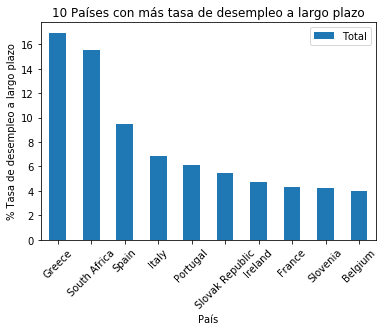

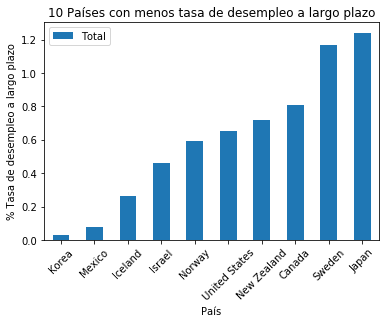

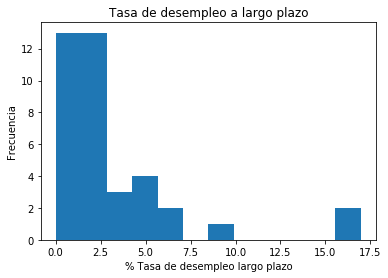

In [99]:
JE_LTURSort2=JE_LTURSort[['Country', 'Total']]
JE_LTURSort10mas=JE_LTURSort2.set_index('Country').nlargest(10,'Total')
JE_LTURSort10menos=JE_LTURSort2.set_index('Country').nsmallest(10,'Total')

JE_LTURSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('% Tasa de desempleo a largo plazo')
plt.title('10 Países con más tasa de desempleo a largo plazo')
plt.show()

JE_LTURSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('% Tasa de desempleo a largo plazo')
plt.title('10 Países con menos tasa de desempleo a largo plazo')
plt.show()

plt.hist(JE_LTURSort['Total'],12)
plt.xlabel("% Tasa de desempleo largo plazo")
plt.ylabel('Frecuencia')
plt.title("Tasa de desempleo a largo plazo")
plt.show()

#### Observaciones:
##### Grecia tiene la mayor tasa de desempleo a largo plazo, con un porcentaje del 16.95

 #### 21. Tiempo dedicado al ocio y cuidado personal 'WL_TNOW' = Time devoted to leisure and personal care

In [100]:
WL_TNOW=grupo1.get_group('WL_TNOW')
WL_TNOWSort=WL_TNOW.sort_values('Total', ascending=False)
WL_TNOWSort['Rank']=Rank
WL_TNOWSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
3288,France,Time devoted to leisure and personal care,WL_TNOW,Hours,16.36,1
3305,Spain,Time devoted to leisure and personal care,WL_TNOW,Hours,15.93,2
3299,Netherlands,Time devoted to leisure and personal care,WL_TNOW,Hours,15.90,3


In [101]:
WL_TNOWSort['Total'].describe()

count    38.000000
mean     14.834211
std       0.755658
min      12.590000
25%      14.475000
50%      14.895000
75%      15.165000
max      16.360000
Name: Total, dtype: float64

In [102]:
NivDes21=[]

for x in WL_TNOWSort['Total']:
    if x < 14.500:
        y = 1
    elif x < 14.900:
        y = 2
    elif x < 15.160:
         y = 3
    else: 
        y = 4
    NivDes21.append(y)

WL_TNOWSort['NivDes']=NivDes21
WL_TNOWSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
3288,France,Time devoted to leisure and personal care,WL_TNOW,Hours,16.36,1,4
3305,Spain,Time devoted to leisure and personal care,WL_TNOW,Hours,15.93,2,4
3299,Netherlands,Time devoted to leisure and personal care,WL_TNOW,Hours,15.90,3,4
3286,Denmark,Time devoted to leisure and personal care,WL_TNOW,Hours,15.87,4,4
3283,Belgium,Time devoted to leisure and personal care,WL_TNOW,Hours,15.77,5,4


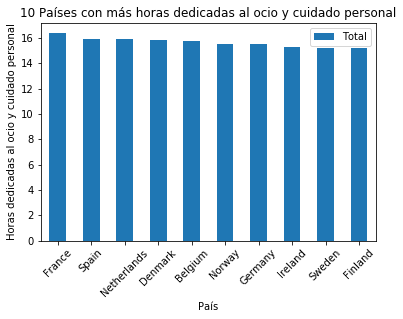

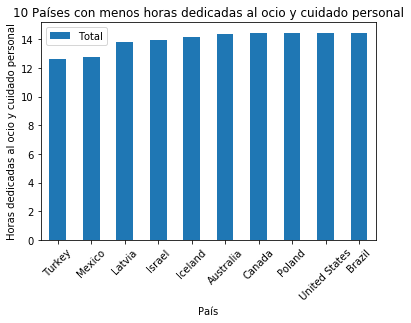

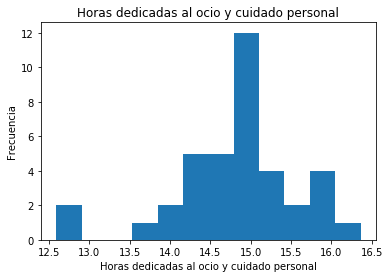

In [103]:
WL_TNOWSort2=WL_TNOWSort[['Country', 'Total']]
WL_TNOWSort10mas=WL_TNOWSort2.set_index('Country').nlargest(10,'Total')
WL_TNOWSort10menos=WL_TNOWSort2.set_index('Country').nsmallest(10,'Total')

WL_TNOWSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Horas dedicadas al ocio y cuidado personal')
plt.title('10 Países con más horas dedicadas al ocio y cuidado personal')
plt.show()

WL_TNOWSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Horas dedicadas al ocio y cuidado personal')
plt.title('10 Países con menos horas dedicadas al ocio y cuidado personal')
plt.show()

plt.hist(WL_TNOWSort['Total'],12)
plt.xlabel("Horas dedicadas al ocio y cuidado personal")
plt.ylabel('Frecuencia')
plt.title("Horas dedicadas al ocio y cuidado personal")
plt.show()

#### Observaciones:
##### De nuevo, Turquía y México ocupan los lugares más bajos en cuanto a horas dedicadas al ocio; por otro lado, Francia junto con España tienen el mayor número de horas dedicadas al ocio. 

#### 22. Satisfacción de vida 'SW_LIFS' = Life satisfaction

In [104]:
SW_LIFS=grupo1.get_group('SW_LIFS')
SW_LIFSSort=SW_LIFS.sort_values('Total', ascending=False)
SW_LIFSSort['Rank']=Rank
SW_LIFSSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
2870,Iceland,Life satisfaction,SW_LIFS,Average score,7.5,1
2879,Norway,Life satisfaction,SW_LIFS,Average score,7.5,2
2864,Denmark,Life satisfaction,SW_LIFS,Average score,7.5,3


In [105]:
SW_LIFSSort['Total'].describe()

count    38.000000
mean      6.528947
std       0.776307
min       4.800000
25%       5.900000
50%       6.650000
75%       7.275000
max       7.500000
Name: Total, dtype: float64

In [106]:
NivDes22=[]

for x in SW_LIFSSort['Total']:
    if x < 5.900:
        y = 1
    elif x < 6.600:
        y = 2
    elif x < 7.250:
         y = 3
    else: 
        y = 4
    NivDes22.append(y)

SW_LIFSSort['NivDes']=NivDes22
SW_LIFSSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2870,Iceland,Life satisfaction,SW_LIFS,Average score,7.5,1,4
2879,Norway,Life satisfaction,SW_LIFS,Average score,7.5,2,4
2864,Denmark,Life satisfaction,SW_LIFS,Average score,7.5,3,4
2865,Finland,Life satisfaction,SW_LIFS,Average score,7.5,4,4
2885,Switzerland,Life satisfaction,SW_LIFS,Average score,7.5,5,4


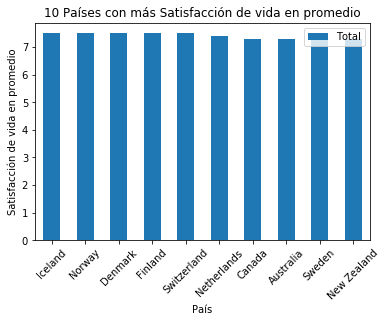

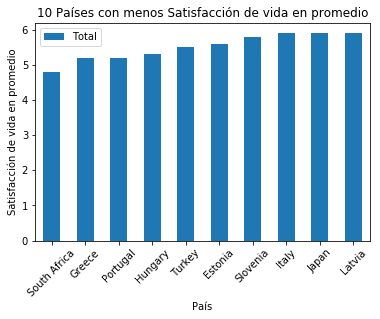

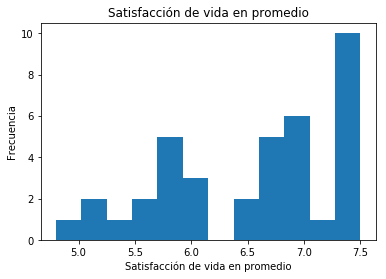

In [107]:
SW_LIFSSort2=SW_LIFSSort[['Country', 'Total']]
SW_LIFSSort10mas=SW_LIFSSort2.set_index('Country').nlargest(10,'Total')
SW_LIFSSort10menos=SW_LIFSSort2.set_index('Country').nsmallest(10,'Total')

SW_LIFSSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Satisfacción de vida en promedio')
plt.title('10 Países con más Satisfacción de vida en promedio')
plt.show()

SW_LIFSSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Satisfacción de vida en promedio')
plt.title('10 Países con menos Satisfacción de vida en promedio')
plt.show()

plt.hist(SW_LIFSSort['Total'],12)
plt.xlabel("Satisfacción de vida en promedio")
plt.ylabel('Frecuencia')
plt.title("Satisfacción de vida en promedio")
plt.show()


#### Observaciones:
Islandia, Noruega, Dinamarca y Finlanda encabezan la lista, todos tienen 7.5% y South Africa junto con Grecia son los más bajos.

#### 23.  Compromiso de los grupos de interés para desarrollar regulaciones. 'CG_SENG' = Stakeholder engagement for developing regulations

In [108]:
CG_SENG=grupo1.get_group('CG_SENG')
CG_SENGSort=CG_SENG.sort_values('Total', ascending=False)
CG_SENGSort['Rank']=Rank
CG_SENGSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
56,Mexico,Stakeholder engagement for developing regulations,CG_SENG,Average score,3.5,1
68,United States,Stakeholder engagement for developing regulations,CG_SENG,Average score,3.2,2
42,Canada,Stakeholder engagement for developing regulations,CG_SENG,Average score,3.0,3


In [109]:
CG_SENGSort['Total'].describe()

count    38.000000
mean      2.050000
std       0.696225
min       0.800000
25%       1.500000
50%       2.100000
75%       2.600000
max       3.500000
Name: Total, dtype: float64

In [110]:
NivDes23=[]

for x in CG_SENGSort['Total']:
    if x < 1.500:
        y = 1
    elif x < 2.100:
        y = 2
    elif x < 2.600:
         y = 3
    else: 
        y = 4
    NivDes23.append(y)

CG_SENGSort['NivDes']=NivDes23
CG_SENGSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
56,Mexico,Stakeholder engagement for developing regulations,CG_SENG,Average score,3.5,1,4
68,United States,Stakeholder engagement for developing regulations,CG_SENG,Average score,3.2,2,4
42,Canada,Stakeholder engagement for developing regulations,CG_SENG,Average score,3.0,3,4
62,Slovak Republic,Stakeholder engagement for developing regulations,CG_SENG,Average score,2.9,4,4
67,United Kingdom,Stakeholder engagement for developing regulations,CG_SENG,Average score,2.9,5,4


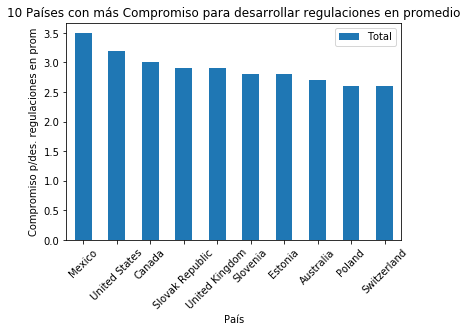

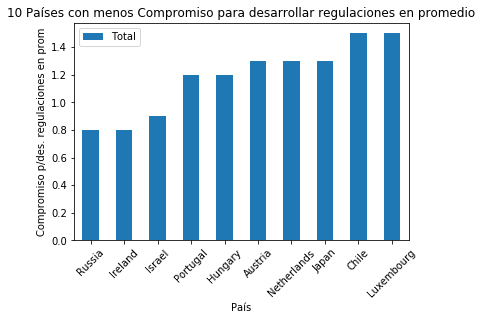

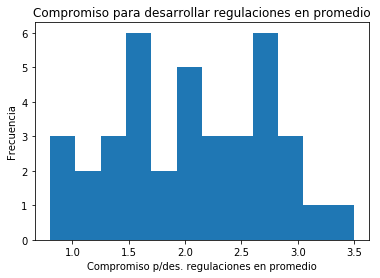

In [111]:
CG_SENGSort2=CG_SENGSort[['Country', 'Total']]
CG_SENGSort10mas=CG_SENGSort2.set_index('Country').nlargest(10,'Total')
CG_SENGSort10menos=CG_SENGSort2.set_index('Country').nsmallest(10,'Total')

CG_SENGSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Compromiso p/des. regulaciones en prom')
plt.title('10 Países con más Compromiso para desarrollar regulaciones en promedio')
plt.show()

CG_SENGSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Compromiso p/des. regulaciones en prom')
plt.title('10 Países con menos Compromiso para desarrollar regulaciones en promedio')
plt.show()

plt.hist(CG_SENGSort['Total'],12)
plt.xlabel("Compromiso p/des. regulaciones en promedio")
plt.ylabel('Frecuencia')
plt.title("Compromiso para desarrollar regulaciones en promedio")
plt.show()

#### 24. Habitaciones por persona 'HO_NUMR' = Rooms per person

In [112]:
HO_NUMR=grupo1.get_group('HO_NUMR')
HO_NUMRSort=HO_NUMR.sort_values('Total', ascending=False)
HO_NUMRSort['Rank']=Rank
HO_NUMRSort.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank
504,Canada,Rooms per person,HO_NUMR,Ratio,2.5,1
520,New Zealand,Rooms per person,HO_NUMR,Ratio,2.4,2
530,United States,Rooms per person,HO_NUMR,Ratio,2.4,3


In [113]:
HO_NUMRSort['Total'].describe()

count    38.000000
mean      1.642105
std       0.472275
min       0.700000
25%       1.200000
50%       1.750000
75%       1.900000
max       2.500000
Name: Total, dtype: float64

In [114]:
NivDes24=[]

for x in HO_NUMRSort['Total']:
    if x < 1.200:
        y = 1
    elif x < 1.800:
        y = 2
    elif x < 1.900:
         y = 3
    else: 
        y = 4
    NivDes24.append(y)

HO_NUMRSort['NivDes']=NivDes24
HO_NUMRSort.head(5)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
504,Canada,Rooms per person,HO_NUMR,Ratio,2.5,1,4
520,New Zealand,Rooms per person,HO_NUMR,Ratio,2.4,2,4
530,United States,Rooms per person,HO_NUMR,Ratio,2.4,3,4
501,Australia,Rooms per person,HO_NUMR,Ratio,2.3,4,4
503,Belgium,Rooms per person,HO_NUMR,Ratio,2.2,5,4


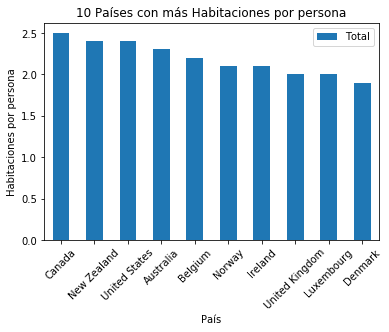

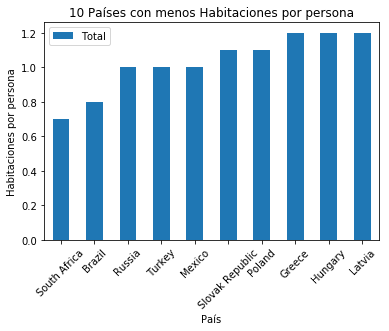

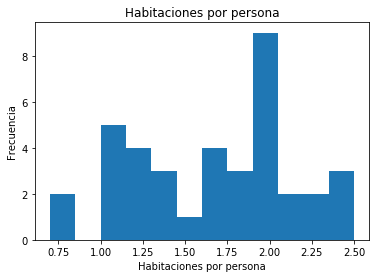

In [115]:
HO_NUMRSort2=HO_NUMRSort[['Country', 'Total']]
HO_NUMRSort10mas=HO_NUMRSort2.set_index('Country').nlargest(10,'Total')
HO_NUMRSort10menos=HO_NUMRSort2.set_index('Country').nsmallest(10,'Total')

HO_NUMRSort10mas.plot.bar(rot='45')
plt.xlabel("País")
plt.ylabel('Habitaciones por persona')
plt.title('10 Países con más Habitaciones por persona')
plt.show()

HO_NUMRSort10menos.plot.bar(rot='45')
plt.xlabel('País')
plt.ylabel('Habitaciones por persona')
plt.title('10 Países con menos Habitaciones por persona')
plt.show()

plt.hist(HO_NUMRSort['Total'],12)
plt.xlabel("Habitaciones por persona")
plt.ylabel('Frecuencia')
plt.title("Habitaciones por persona")
plt.show()

In [116]:
BLINivDes=pd.concat([IW_HNFWSort,JE_PEARNSort,IW_HADISort,ES_STCSSort,
                   EQ_WATERSort,SC_SNTWSSort,ES_EDUASort,CG_VOTOSort,
                   HS_SFRHSort,JE_EMPLSort,HS_LEBSort,HO_BASESort,
                  PS_FSAFENSort,WL_EWLHSort,EQ_AIRPSort,PS_REPHSort,
                  JE_LMISSort,ES_EDUEXSort, HO_HISHSort,JE_LTURSort,])

BLINivDes1=BLINivDes.sort_values('NivDes')
BLINivDes1.head(3)

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
961,South Africa,Employment rate,JE_EMPL,Percentage,43.0,38,1
2366,Japan,Voter turnout,CG_VOTO,Percentage,53.0,35,1
2373,Poland,Voter turnout,CG_VOTO,Percentage,55.0,34,1


In [117]:
BLINivDes2=BLINivDes1.sort_values('Country', ascending=True)
BLINivDes2.head()

,Country,Indicator,INDICATOR,Unit,Total,Rank,NivDes
2664,Australia,Self-reported health,HS_SFRH,Percentage,85.0,4,4
2003,Australia,Years in education,ES_EDUEX,Years,21.2,1,4
154,Australia,Feeling safe walking alone at night,PS_FSAFEN,Percentage,63.6,27,2
386,Australia,Housing expenditure,HO_HISH,Percentage,20.0,28,2
3047,Australia,Homicide rate,PS_REPH,Ratio,1.0,18,2


In [118]:
#pd.pivot_table(BLINivDes2, values = 'Total', index=['INDICATOR']).reset_index()
                                                               
BLIpivot=pd.pivot_table(BLINivDes2, values = 'Total', index=['Country'], columns = 'INDICATOR')
BLIpivot.head(39)                                                     

INDICATOR,CG_VOTO,EQ_AIRP,EQ_WATER,ES_EDUA,ES_EDUEX,ES_STCS,HO_BASE,HO_HISH,HS_LEB,HS_SFRH,IW_HADI,IW_HNFW,JE_EMPL,JE_LMIS,JE_LTUR,JE_PEARN,PS_FSAFEN,PS_REPH,SC_SNTWS,WL_EWLH
Country,,,,,,,,,,,,,,,,,,,,
Australia,91.0,5.0,92.0,80.0,21.2,502.0,1.1,20.0,82.5,85.0,33417.0,57462.0,72.0,4.3,1.36,52063.0,63.6,1.0,94.0,13.20
Austria,75.0,16.0,93.0,85.0,17.1,492.0,1.0,21.0,81.3,70.0,32544.0,59574.0,72.0,2.7,1.94,48295.0,80.7,0.4,92.0,6.78
Belgium,89.0,15.0,84.0,75.0,18.2,503.0,2.3,21.0,81.1,75.0,29968.0,104084.0,62.0,4.8,3.98,49587.0,70.7,1.0,92.0,4.31
Brazil,79.0,10.0,72.0,49.0,15.9,395.0,6.7,20.0,74.7,70.0,12227.0,7102.0,64.0,4.9,3.37,14024.0,37.3,27.6,90.0,7.15
Canada,68.0,7.0,91.0,91.0,16.7,523.0,0.2,22.0,81.5,88.0,29850.0,85758.0,73.0,3.9,0.81,48403.0,80.9,1.4,93.0,3.73
Chile,49.0,16.0,69.0,65.0,17.3,443.0,9.4,18.0,79.1,57.0,16588.0,21409.0,62.0,8.1,2.02,28434.0,51.1,4.5,84.0,10.06
Czech Republic,59.0,20.0,87.0,93.0,17.3,491.0,0.6,24.0,78.7,61.0,21103.0,24258.0,72.0,1.8,1.71,23722.0,68.3,0.8,89.0,5.77
Denmark,86.0,9.0,94.0,81.0,19.7,504.0,0.6,24.0,80.8,72.0,28950.0,73543.0,75.0,2.3,1.35,52580.0,83.0,0.7,95.0,2.20
Estonia,64.0,8.0,82.0,89.0,15.8,524.0,6.9,18.0,77.7,51.0,18665.0,16967.0,72.0,4.0,2.13,23621.0,67.2,3.1,90.0,2.69


In [119]:
paises=BLINivDes2.groupby(['Country'])['NivDes'].agg('sum').reset_index()
#df.groupby(['Fruit','Name'])['Number'].sum().reset_index()
paises.head(39)

,Country,NivDes
0,Australia,61
1,Austria,59
2,Belgium,55
3,Brazil,33
4,Canada,67
5,Chile,28
6,Czech Republic,48
7,Denmark,69
8,Estonia,41
9,Finland,65


In [120]:
calidadVida=[]
for pais in paises['NivDes']:
    if pais > 72:
        calidadVida.append('País con Mejor Calidad de Vida')
    elif pais > 48:
        calidadVida.append('País con calidad de vida Buena')
    elif pais > 24:
        calidadVida.append('País con calidad de vida Regular')
    else:
        calidadVida.append('País con Mala calidad de vida')
paises['Calidad de Vida']=calidadVida
paises.head(39)

,Country,NivDes,Calidad de Vida
0,Australia,61,País con calidad de vida Buena
1,Austria,59,País con calidad de vida Buena
2,Belgium,55,País con calidad de vida Buena
3,Brazil,33,País con calidad de vida Regular
4,Canada,67,País con calidad de vida Buena
5,Chile,28,País con calidad de vida Regular
6,Czech Republic,48,País con calidad de vida Regular
7,Denmark,69,País con calidad de vida Buena
8,Estonia,41,País con calidad de vida Regular
9,Finland,65,País con calidad de vida Buena


In [121]:
paises2=paises.sort_values('Country', ascending=True)
paises2.head(40)

,Country,NivDes,Calidad de Vida
0,Australia,61,País con calidad de vida Buena
1,Austria,59,País con calidad de vida Buena
2,Belgium,55,País con calidad de vida Buena
3,Brazil,33,País con calidad de vida Regular
4,Canada,67,País con calidad de vida Buena
5,Chile,28,País con calidad de vida Regular
6,Czech Republic,48,País con calidad de vida Regular
7,Denmark,69,País con calidad de vida Buena
8,Estonia,41,País con calidad de vida Regular
9,Finland,65,País con calidad de vida Buena


In [122]:
BLIpivot1=BLIpivot.rename_axis("Pais")
BLIpivot1["Country"]=BLIpivot1.index
BLIpivot1.head(40)

INDICATOR,CG_VOTO,EQ_AIRP,EQ_WATER,ES_EDUA,ES_EDUEX,ES_STCS,HO_BASE,HO_HISH,HS_LEB,HS_SFRH,...,IW_HNFW,JE_EMPL,JE_LMIS,JE_LTUR,JE_PEARN,PS_FSAFEN,PS_REPH,SC_SNTWS,WL_EWLH,Country
Pais,,,,,,,,,,,,,,,,,,,,,
Australia,91.0,5.0,92.0,80.0,21.2,502.0,1.1,20.0,82.5,85.0,...,57462.0,72.0,4.3,1.36,52063.0,63.6,1.0,94.0,13.20,Australia
Austria,75.0,16.0,93.0,85.0,17.1,492.0,1.0,21.0,81.3,70.0,...,59574.0,72.0,2.7,1.94,48295.0,80.7,0.4,92.0,6.78,Austria
Belgium,89.0,15.0,84.0,75.0,18.2,503.0,2.3,21.0,81.1,75.0,...,104084.0,62.0,4.8,3.98,49587.0,70.7,1.0,92.0,4.31,Belgium
Brazil,79.0,10.0,72.0,49.0,15.9,395.0,6.7,20.0,74.7,70.0,...,7102.0,64.0,4.9,3.37,14024.0,37.3,27.6,90.0,7.15,Brazil
Canada,68.0,7.0,91.0,91.0,16.7,523.0,0.2,22.0,81.5,88.0,...,85758.0,73.0,3.9,0.81,48403.0,80.9,1.4,93.0,3.73,Canada
Chile,49.0,16.0,69.0,65.0,17.3,443.0,9.4,18.0,79.1,57.0,...,21409.0,62.0,8.1,2.02,28434.0,51.1,4.5,84.0,10.06,Chile
Czech Republic,59.0,20.0,87.0,93.0,17.3,491.0,0.6,24.0,78.7,61.0,...,24258.0,72.0,1.8,1.71,23722.0,68.3,0.8,89.0,5.77,Czech Republic
Denmark,86.0,9.0,94.0,81.0,19.7,504.0,0.6,24.0,80.8,72.0,...,73543.0,75.0,2.3,1.35,52580.0,83.0,0.7,95.0,2.20,Denmark
Estonia,64.0,8.0,82.0,89.0,15.8,524.0,6.9,18.0,77.7,51.0,...,16967.0,72.0,4.0,2.13,23621.0,67.2,3.1,90.0,2.69,Estonia


In [123]:
BLIpivot2=pd.merge(BLIpivot1, paises2, how="outer")

In [124]:
BLIpivot2.head(39)

,CG_VOTO,EQ_AIRP,EQ_WATER,ES_EDUA,ES_EDUEX,ES_STCS,HO_BASE,HO_HISH,HS_LEB,HS_SFRH,...,JE_LMIS,JE_LTUR,JE_PEARN,PS_FSAFEN,PS_REPH,SC_SNTWS,WL_EWLH,Country,NivDes,Calidad de Vida
0,91.0,5.0,92.0,80.0,21.2,502.0,1.1,20.0,82.5,85.0,...,4.3,1.36,52063.0,63.6,1.0,94.0,13.20,Australia,61,País con calidad de vida Buena
1,75.0,16.0,93.0,85.0,17.1,492.0,1.0,21.0,81.3,70.0,...,2.7,1.94,48295.0,80.7,0.4,92.0,6.78,Austria,59,País con calidad de vida Buena
2,89.0,15.0,84.0,75.0,18.2,503.0,2.3,21.0,81.1,75.0,...,4.8,3.98,49587.0,70.7,1.0,92.0,4.31,Belgium,55,País con calidad de vida Buena
3,79.0,10.0,72.0,49.0,15.9,395.0,6.7,20.0,74.7,70.0,...,4.9,3.37,14024.0,37.3,27.6,90.0,7.15,Brazil,33,País con calidad de vida Regular
4,68.0,7.0,91.0,91.0,16.7,523.0,0.2,22.0,81.5,88.0,...,3.9,0.81,48403.0,80.9,1.4,93.0,3.73,Canada,67,País con calidad de vida Buena
5,49.0,16.0,69.0,65.0,17.3,443.0,9.4,18.0,79.1,57.0,...,8.1,2.02,28434.0,51.1,4.5,84.0,10.06,Chile,28,País con calidad de vida Regular
6,59.0,20.0,87.0,93.0,17.3,491.0,0.6,24.0,78.7,61.0,...,1.8,1.71,23722.0,68.3,0.8,89.0,5.77,Czech Republic,48,País con calidad de vida Regular
7,86.0,9.0,94.0,81.0,19.7,504.0,0.6,24.0,80.8,72.0,...,2.3,1.35,52580.0,83.0,0.7,95.0,2.20,Denmark,69,País con calidad de vida Buena
8,64.0,8.0,82.0,89.0,15.8,524.0,6.9,18.0,77.7,51.0,...,4.0,2.13,23621.0,67.2,3.1,90.0,2.69,Estonia,41,País con calidad de vida Regular
9,69.0,6.0,94.0,88.0,19.8,523.0,0.5,23.0,81.6,70.0,...,2.7,2.33,42127.0,82.9,1.4,95.0,3.91,Finland,65,País con calidad de vida Buena


In [125]:
BLIpivot3=BLIpivot2.set_index("Country")

In [126]:
BLIpivot3.head(40)

,CG_VOTO,EQ_AIRP,EQ_WATER,ES_EDUA,ES_EDUEX,ES_STCS,HO_BASE,HO_HISH,HS_LEB,HS_SFRH,...,JE_EMPL,JE_LMIS,JE_LTUR,JE_PEARN,PS_FSAFEN,PS_REPH,SC_SNTWS,WL_EWLH,NivDes,Calidad de Vida
Country,,,,,,,,,,,,,,,,,,,,,
Australia,91.0,5.0,92.0,80.0,21.2,502.0,1.1,20.0,82.5,85.0,...,72.0,4.3,1.36,52063.0,63.6,1.0,94.0,13.20,61,País con calidad de vida Buena
Austria,75.0,16.0,93.0,85.0,17.1,492.0,1.0,21.0,81.3,70.0,...,72.0,2.7,1.94,48295.0,80.7,0.4,92.0,6.78,59,País con calidad de vida Buena
Belgium,89.0,15.0,84.0,75.0,18.2,503.0,2.3,21.0,81.1,75.0,...,62.0,4.8,3.98,49587.0,70.7,1.0,92.0,4.31,55,País con calidad de vida Buena
Brazil,79.0,10.0,72.0,49.0,15.9,395.0,6.7,20.0,74.7,70.0,...,64.0,4.9,3.37,14024.0,37.3,27.6,90.0,7.15,33,País con calidad de vida Regular
Canada,68.0,7.0,91.0,91.0,16.7,523.0,0.2,22.0,81.5,88.0,...,73.0,3.9,0.81,48403.0,80.9,1.4,93.0,3.73,67,País con calidad de vida Buena
Chile,49.0,16.0,69.0,65.0,17.3,443.0,9.4,18.0,79.1,57.0,...,62.0,8.1,2.02,28434.0,51.1,4.5,84.0,10.06,28,País con calidad de vida Regular
Czech Republic,59.0,20.0,87.0,93.0,17.3,491.0,0.6,24.0,78.7,61.0,...,72.0,1.8,1.71,23722.0,68.3,0.8,89.0,5.77,48,País con calidad de vida Regular
Denmark,86.0,9.0,94.0,81.0,19.7,504.0,0.6,24.0,80.8,72.0,...,75.0,2.3,1.35,52580.0,83.0,0.7,95.0,2.20,69,País con calidad de vida Buena
Estonia,64.0,8.0,82.0,89.0,15.8,524.0,6.9,18.0,77.7,51.0,...,72.0,4.0,2.13,23621.0,67.2,3.1,90.0,2.69,41,País con calidad de vida Regular


#### De los 24 indicadores, existen seis que tienen valor "negativo": 
     Vivienda con instalaciones básicas (indicador 13)
     Empleados trabajando horas muy largas (indicador 14)
     La contaminación del aire (indicador 15)
     Tasa de homicidios (indicador 16)
     Inseguridad laboral (indicador 17)  y
     Tasa de desempleo a largo plazo (indicador 20)
     
##### Observamos que Estados Unidos está clasificado en la mayoría de los indicadores entre los mejores 5, sin embargo, en educación no está bien posicionado. 

##### Japón también sobresale en numerosos indicadores, entre algunos, expectativa de vida.

##### También vemos que Islandia tiene unos mejores índices "dirigidos a la ecología" (ej. calidad de agua, satisfacción de vida)


#### En este punto, comenzamos con el modelo de Machine Learning, trataremos de enfocarnos en la certeza de la predicción; el objetivo es encontrar un modelos que tenga un buen performance, cuyo porcentaje de certeza sea alto. Decidimos probar con el modelo knn. 

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

/Users/axtel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [128]:
# Crear el train y test para el modelo
numitems = len(BLIpivot2)
percenttrain = 0.85
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print ('Training set: '+str(numtrain)+ ' registros')
print ('Test set: '+str( numtest)+ ' registros')
BLIpivot2Train = BLIpivot2[0:numtrain]
BLIpivot2Test = BLIpivot2[numtrain:]

Training set: 32 registros
Test set: 6 registros


In [129]:
# Predecir la calidad de vida, de acuerdo a otros indicadores
features = ['JE_PEARN', 'ES_EDUEX','IW_HADI','HS_LEB','HO_HISH','JE_LTUR']
neighbors = 6
classifier = KNeighborsClassifier(neighbors)
classifier.fit(BLIpivot2Train[features], BLIpivot2Train['Calidad de Vida'])
predictions = classifier.predict(BLIpivot2Test[features])
# Calcular la certeza
prediccionescorrectas=[predictions==BLIpivot2Test['Calidad de Vida'].values]
accuracy=np.sum(prediccionescorrectas)/len(predictions)
print('Precisión de knn: ' + str(accuracy)+ ' con ' + str(neighbors) + ' vecinos.')

Precisión de knn: 1.0 con 6 vecinos.


In [130]:
numtrain = len(BLIpivot2Train)
numtest = len(BLIpivot2Test)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', BLIpivot2Test.loc[numtrain+i]['Calidad de Vida'])
    if predictions[i] == BLIpivot2Test.loc[numtrain+i]['Calidad de Vida']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))
##Comment out print, try other values for neighbors, other features

Predicted: País con calidad de vida Buena  Actual: País con calidad de vida Buena
Predicted: País con calidad de vida Buena  Actual: País con calidad de vida Buena
Predicted: País con calidad de vida Buena  Actual: País con calidad de vida Buena
Predicted: País con calidad de vida Regular  Actual: País con calidad de vida Regular
Predicted: País con calidad de vida Buena  Actual: País con calidad de vida Buena
Predicted: País con calidad de vida Buena  Actual: País con calidad de vida Buena
Accuracy: 1.0


### Concluciones

El presente modelo de Knn, nos arrojo un Certeza de 1,
Y con este modelo podemos predecir la Calidad de Vida de los paises segun los indicadores.
